In [31]:
import pandas as pd
from scipy.stats import chi2_contingency, pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [32]:
pd.set_option('display.max_columns', None)

df = pd.read_pickle("./data/df_merge_club_transfer_data_prep1.pkl")

In [33]:
df
## WEEKDAY vs RESULT (chiquadrat test)
## MONTH vs RESULT (chiquadrat test)
## SEASON vs SUM(HOME_GOALS, AWAY_GOALS)  (Werden mehr Tore über die Saison geschossen?)
## PLACE_HOME_TEAM vs. (HOME_GOALS - AWAY_GOALS) (Scatterplot)  (Schießen die mehr Tore, wenn Sie in einer besseren Position sind)
## PLACE_AWAY_TEAM vs. (AWAY_GOALS - HOME_GOALS) (Scatterplot)  (Schießen die mehr Tore, wenn Sie in einer besseren Position sind)
## WIN_PERC_HOME vs. (HOME GOALS - AWAY_GOALS)
## HOME_PLAYERS_COUNT vs. RESULTS
## HOME_PLAYERS_COUNT - AWAY_PLAYERS_COUNT vs. RESULTS
## HOME_PLAYERS_AVG_AGE vs. RESULTS
## HOME_PLAYERS_AVG_AGE-HOME_PLAYERS_AVG_AGE vs. RESULTS
## HOME_PLAYERS_AVG_AGE vs. RESULTS
## HOME_LEGIONARIES_COUNT vs. 

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE,HOME_PLAYERS_COUNT,HOME_PLAYERS_AVG_AGE,HOME_LEGIONARIES_COUNT,HOME_AVG_MARKET_VALUE,HOME_TOTAL_MARKET_VALUE,HOME_AVG_AGE_JOINING,HOME_AVG_AGE_LEAVING,HOME_TOTAL_VALUE_JOINING_MIO,HOME_TOTAL_VALUE_LEAVING_MIO,HOME_EXPENSES_JOINING_MIO,HOME_REVENUE_LEAVING_MIO,AWAY_PLAYERS_COUNT,AWAY_PLAYERS_AVG_AGE,AWAY_LEGIONARIES_COUNT,AWAY_AVG_MARKET_VALUE,AWAY_TOTAL_MARKET_VALUE,AWAY_AVG_AGE_JOINING,AWAY_AVG_AGE_LEAVING,AWAY_TOTAL_VALUE_JOINING_MIO,AWAY_TOTAL_VALUE_LEAVING_MIO,AWAY_EXPENSES_JOINING_MIO,AWAY_REVENUE_LEAVING_MIO
0,2004-08-06,4,8,2004,1,SV Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann,29,25.0,14,3400000.0,98480000.0,24.8,26.4,NaN,NaN,9.00,6.45,33,25.6,15,2620000.0,86330000.0,23.3,27.8,NaN,NaN,4.65,0.05
1,2004-08-07,5,8,2004,1,1.FC Kaiserslautern,12,1.FC Nürnberg,14,NaN,NaN,NaN,1.0,3.0,AWAY_WIN,Michael Weiner,32,26.6,14,1050000.0,33750000.0,25.8,27.6,0.075,NaN,0.55,6.00,29,25.6,12,1200000.0,34900000.0,25.4,27.9,NaN,NaN,2.25,0.15
2,2004-08-07,5,8,2004,1,SC Freiburg,18,FC Hansa Rostock,17,NaN,NaN,NaN,0.0,0.0,DRAW,Dr. Helmut Fleischer,32,25.8,19,701000.0,22430000.0,22.4,24.8,NaN,0.075,1.40,0.05,28,27.5,14,925000.0,25900000.0,26.1,28.1,NaN,NaN,0.55,0.50
3,2004-08-07,5,8,2004,1,Borussia Dortmund,7,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Wolfgang Stark,36,24.5,18,2180000.0,78330000.0,21.9,26.2,NaN,NaN,NaN,10.15,28,27.3,18,2120000.0,59300000.0,25.2,23.2,NaN,NaN,8.50,NaN
4,2004-08-07,5,8,2004,1,Bayer 04 Leverkusen,6,Hannover 96,10,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack,32,24.8,15,2720000.0,86930000.0,23.0,25.0,NaN,NaN,3.75,15.75,35,26.1,23,1230000.0,42980000.0,25.1,26.6,NaN,NaN,1.88,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,2023-05-27,5,5,2022,34,Borussia Mönchengladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck,35,25.4,16,6910000.0,241680000.0,22.1,23.8,45.550,64.030,24.00,23.00,42,25.0,23,3150000.0,132280000.0,22.6,24.6,69.20,39.50,11.45,6.80
5810,2023-05-27,5,5,2022,34,Eintracht Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin,36,25.0,22,9020000.0,324550000.0,22.6,24.2,157.750,66.300,27.80,18.40,29,26.0,11,6930000.0,200950000.0,23.3,23.1,59.75,92.15,15.90,21.33
5811,2023-05-27,5,5,2022,34,VfL Wolfsburg,7,Hertha BSC,18,93.6,3.6,2.8,1.0,2.0,AWAY_WIN,Benjamin Cortus,33,24.7,20,7220000.0,238300000.0,22.3,24.6,78.600,73.450,35.75,23.70,41,25.4,21,2290000.0,94000000.0,23.7,24.4,84.83,80.78,8.55,24.25
5812,2023-05-27,5,5,2022,34,VfL Bochum,16,Bayer 04 Leverkusen,6,13.0,16.5,70.5,3.0,0.0,HOME_WIN,Tobias Welz,32,27.7,18,1680000.0,53700000.0,25.4,26.0,26.800,39.480,1.79,16.05,35,24.2,24,12930000.0,452550000.0,21.8,24.6,55.85,27.65,15.10,9.50


### Transformation von Variablen

In [34]:
df['WEEKDAY_CATEGORY'] =  ['MO-THUR' if x in [0,1,2,3] else x if x in [4,5,6] else pd.nan for x in df['WEEKDAY']]
df['SEASONAL_CHANGES_IN_YEAR'] = ['Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Autumn' if x in [9,10,11] else 'Winter' if x in [12,1,2] else pd.nan for x in df['MONTH']]
df['BUNDESLIGA_HALF'] = ['First Half' if x in range(0,18) else 'Second Half' if x in range(18, 35) else pd.nan for x in df['MATCHDAY']]
df['GOALS_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_GOALS'],df['AWAY_GOALS'])]
df['PLAYERS_COUNT_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_PLAYERS_COUNT'],df['AWAY_PLAYERS_COUNT'])]
df['PLAYERS_AVG_AGE_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_PLAYERS_AVG_AGE'],df['AWAY_PLAYERS_AVG_AGE'])]
df['LEGIONARIES_COUNT_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_LEGIONARIES_COUNT'],df['AWAY_LEGIONARIES_COUNT'])]
df['AVG_MARKET_VALUE_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_AVG_MARKET_VALUE'],df['AWAY_AVG_MARKET_VALUE'])]
df['TOTAL_MARKET_VALUE_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_TOTAL_MARKET_VALUE'],df['AWAY_TOTAL_MARKET_VALUE'])]
df['AVG_AGE_JOINING_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_AVG_AGE_JOINING'],df['AWAY_AVG_AGE_JOINING'])]
df['AVG_AGE_LEAVING_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_AVG_AGE_LEAVING'],df['AWAY_AVG_AGE_LEAVING'])]
df['TOTAL_VALUE_JOINING_MIO_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_TOTAL_VALUE_JOINING_MIO'],df['AWAY_TOTAL_VALUE_JOINING_MIO'])]
df['TOTAL_VALUE_LEAVING_MIO_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_TOTAL_VALUE_LEAVING_MIO'],df['AWAY_TOTAL_VALUE_LEAVING_MIO'])]

df['EXPENSES_JOINING_MIO_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_EXPENSES_JOINING_MIO'],df['AWAY_EXPENSES_JOINING_MIO'])]
df['REVENUE_LEAVING_MIO_DIFFERENCE'] = [x-y for x,y in zip(df['HOME_REVENUE_LEAVING_MIO'],df['AWAY_REVENUE_LEAVING_MIO'])]

In [35]:
df

,DATE,WEEKDAY,MONTH,SEASON,MATCHDAY,HOME_TEAM,PLACE_HOME_TEAM,AWAY_TEAM,PLACE_AWAY_TEAM,WIN_PERC_HOME,REMIS_PERC,WIN_PERC_AWAY,HOME_GOALS,AWAY_GOALS,RESULT,REFEREE,HOME_PLAYERS_COUNT,HOME_PLAYERS_AVG_AGE,HOME_LEGIONARIES_COUNT,HOME_AVG_MARKET_VALUE,HOME_TOTAL_MARKET_VALUE,HOME_AVG_AGE_JOINING,HOME_AVG_AGE_LEAVING,HOME_TOTAL_VALUE_JOINING_MIO,HOME_TOTAL_VALUE_LEAVING_MIO,HOME_EXPENSES_JOINING_MIO,HOME_REVENUE_LEAVING_MIO,AWAY_PLAYERS_COUNT,AWAY_PLAYERS_AVG_AGE,AWAY_LEGIONARIES_COUNT,AWAY_AVG_MARKET_VALUE,AWAY_TOTAL_MARKET_VALUE,AWAY_AVG_AGE_JOINING,AWAY_AVG_AGE_LEAVING,AWAY_TOTAL_VALUE_JOINING_MIO,AWAY_TOTAL_VALUE_LEAVING_MIO,AWAY_EXPENSES_JOINING_MIO,AWAY_REVENUE_LEAVING_MIO,WEEKDAY_CATEGORY,SEASONAL_CHANGES_IN_YEAR,BUNDESLIGA_HALF,GOALS_DIFFERENCE,PLAYERS_COUNT_DIFFERENCE,PLAYERS_AVG_AGE_DIFFERENCE,LEGIONARIES_COUNT_DIFFERENCE,AVG_MARKET_VALUE_DIFFERENCE,TOTAL_MARKET_VALUE_DIFFERENCE,AVG_AGE_JOINING_DIFFERENCE,AVG_AGE_LEAVING_DIFFERENCE,TOTAL_VALUE_JOINING_MIO_DIFFERENCE,TOTAL_VALUE_LEAVING_MIO_DIFFERENCE,EXPENSES_JOINING_MIO_DIFFERENCE,REVENUE_LEAVING_MIO_DIFFERENCE
0,2004-08-06,4,8,2004,1,SV Werder Bremen,3,FC Schalke 04,2,NaN,NaN,NaN,1.0,0.0,HOME_WIN,Stefan Trautmann,29,25.0,14,3400000.0,98480000.0,24.8,26.4,NaN,NaN,9.00,6.45,33,25.6,15,2620000.0,86330000.0,23.3,27.8,NaN,NaN,4.65,0.05,4,Summer,First Half,1.0,-4,-0.6,-1,780000.0,12150000.0,1.5,-1.4,NaN,NaN,4.35,6.40
1,2004-08-07,5,8,2004,1,1.FC Kaiserslautern,12,1.FC Nürnberg,14,NaN,NaN,NaN,1.0,3.0,AWAY_WIN,Michael Weiner,32,26.6,14,1050000.0,33750000.0,25.8,27.6,0.075,NaN,0.55,6.00,29,25.6,12,1200000.0,34900000.0,25.4,27.9,NaN,NaN,2.25,0.15,5,Summer,First Half,-2.0,3,1.0,2,-150000.0,-1150000.0,0.4,-0.3,NaN,NaN,-1.70,5.85
2,2004-08-07,5,8,2004,1,SC Freiburg,18,FC Hansa Rostock,17,NaN,NaN,NaN,0.0,0.0,DRAW,Dr. Helmut Fleischer,32,25.8,19,701000.0,22430000.0,22.4,24.8,NaN,0.075,1.40,0.05,28,27.5,14,925000.0,25900000.0,26.1,28.1,NaN,NaN,0.55,0.50,5,Summer,First Half,0.0,4,-1.7,5,-224000.0,-3470000.0,-3.7,-3.3,NaN,NaN,0.85,-0.45
3,2004-08-07,5,8,2004,1,Borussia Dortmund,7,VfL Wolfsburg,9,NaN,NaN,NaN,1.0,2.0,AWAY_WIN,Wolfgang Stark,36,24.5,18,2180000.0,78330000.0,21.9,26.2,NaN,NaN,NaN,10.15,28,27.3,18,2120000.0,59300000.0,25.2,23.2,NaN,NaN,8.50,NaN,5,Summer,First Half,-1.0,8,-2.8,0,60000.0,19030000.0,-3.3,3.0,NaN,NaN,NaN,NaN
4,2004-08-07,5,8,2004,1,Bayer 04 Leverkusen,6,Hannover 96,10,NaN,NaN,NaN,2.0,1.0,HOME_WIN,Dr. Franz-Xaver Wack,32,24.8,15,2720000.0,86930000.0,23.0,25.0,NaN,NaN,3.75,15.75,35,26.1,23,1230000.0,42980000.0,25.1,26.6,NaN,NaN,1.88,0.65,5,Summer,First Half,1.0,-3,-1.3,-8,1490000.0,43950000.0,-2.1,-1.6,NaN,NaN,1.87,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,2023-05-27,5,5,2022,34,Borussia Mönchengladbach,11,FC Augsburg,14,68.9,22.7,8.3,2.0,0.0,HOME_WIN,Dr. Matthias Jöllenbeck,35,25.4,16,6910000.0,241680000.0,22.1,23.8,45.550,64.030,24.00,23.00,42,25.0,23,3150000.0,132280000.0,22.6,24.6,69.20,39.50,11.45,6.80,5,Spring,Second Half,2.0,-7,0.4,-7,3760000.0,109400000.0,-0.5,-0.8,-23.65,24.53,12.55,16.20
5810,2023-05-27,5,5,2022,34,Eintracht Frankfurt,8,SC Freiburg,5,31.4,37.1,31.5,2.0,1.0,HOME_WIN,Deniz Aytekin,36,25.0,22,9020000.0,324550000.0,22.6,24.2,157.750,66.300,27.80,18.40,29,26.0,11,6930000.0,200950000.0,23.3,23.1,59.75,92.15,15.90,21.33,5,Spring,Second Half,1.0,7,-1.0,11,2090000.0,123600000.0,-0.7,1.1,98.00,-25.85,11.90,-2.93
5811,2023-05-27,5,5,2022,34,VfL Wolfsburg,7,Hertha BSC,18,93.6,3.6,2.8,1.0,2.0,AWAY_WIN,Benjamin Cortus,33,24.7,20,7220000.0,238300000.0,22.3,24.6,78.600,73.450,35.75,23.70,41,25.4,21,2290000.0,94000000.0,23.7,24.4,84.83,80.78,8.55,24.25,5,Spring,Second Half,-1.0,-8,-0.7,-1,4930000.0,144300000.0,-1.4,0.2,-6.23,-7.33,27.20,-0.55
5812,2023-05-27,5,5,2022,34,VfL Bochum,16,Bayer 04 Leverkusen,6,13.0,16.5,70.5,3.0,0.0,HOME_WIN,Tobias Welz,32,27.7,18,1680000.0,5370

### Festlegung des Signifikanz-Niveaus

In [36]:
significance_level= 0.05

### Variablen Listen

In [37]:
df_nom_var_list = df.select_dtypes(include='object').columns
df_nom_var_list

Index(['HOME_TEAM', 'AWAY_TEAM', 'RESULT', 'REFEREE', 'WEEKDAY_CATEGORY',
       'SEASONAL_CHANGES_IN_YEAR', 'BUNDESLIGA_HALF'],
      dtype='object')

In [38]:
df_num_var_list = df.select_dtypes(include='number').columns
df_num_var_list

Index(['WEEKDAY', 'MONTH', 'SEASON', 'MATCHDAY', 'PLACE_HOME_TEAM',
       'PLACE_AWAY_TEAM', 'WIN_PERC_HOME', 'REMIS_PERC', 'WIN_PERC_AWAY',
       'HOME_GOALS', 'AWAY_GOALS', 'HOME_PLAYERS_COUNT',
       'HOME_PLAYERS_AVG_AGE', 'HOME_LEGIONARIES_COUNT',
       'HOME_AVG_MARKET_VALUE', 'HOME_TOTAL_MARKET_VALUE',
       'HOME_AVG_AGE_JOINING', 'HOME_AVG_AGE_LEAVING',
       'HOME_TOTAL_VALUE_JOINING_MIO', 'HOME_TOTAL_VALUE_LEAVING_MIO',
       'HOME_EXPENSES_JOINING_MIO', 'HOME_REVENUE_LEAVING_MIO',
       'AWAY_PLAYERS_COUNT', 'AWAY_PLAYERS_AVG_AGE', 'AWAY_LEGIONARIES_COUNT',
       'AWAY_AVG_MARKET_VALUE', 'AWAY_TOTAL_MARKET_VALUE',
       'AWAY_AVG_AGE_JOINING', 'AWAY_AVG_AGE_LEAVING',
       'AWAY_TOTAL_VALUE_JOINING_MIO', 'AWAY_TOTAL_VALUE_LEAVING_MIO',
       'AWAY_EXPENSES_JOINING_MIO', 'AWAY_REVENUE_LEAVING_MIO',
       'GOALS_DIFFERENCE', 'PLAYERS_COUNT_DIFFERENCE',
       'PLAYERS_AVG_AGE_DIFFERENCE', 'LEGIONARIES_COUNT_DIFFERENCE',
       'AVG_MARKET_VALUE_DIFFERENCE', 'TOTA

## Chiquadrat Test
### Hypothesentest, ob ein Zusammenhang zwischen Variablen besteht, die entweder nominal oder ordinal skaliert sind. Er prüft die Variablen auf stochastische Unabhängigkeit

In [39]:


for nom_cat in df_nom_var_list:
    display()
    display(f'Prüfung auf stochastische Abhängigkeit zwischen {nom_cat} und {"RESULT"} ')
    display()
    contingency_table = pd.crosstab(df[nom_cat], df['RESULT'])

    display('Kontingenztafel:')
    display(contingency_table)

    chi2, p, dof, expected = chi2_contingency(contingency_table)

    

    if p < significance_level:
        #print(f"Chi-Quadrat-Wert: {chi2}")
        print(f"P-Wert: {p}")
        #print(f"Freiheitsgrade: {dof}")
        #print("Erwartete Häufigkeiten:")
        #print(expected)
        print(f"Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {nom_cat}")
    else:
        #print(f"Chi-Quadrat-Wert: {chi2}")
        print(f"P-Wert: {p}")
        #print(f"Freiheitsgrade: {dof}")
        #print("Erwartete Häufigkeiten:")
        #print(expected)
        print(f"Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von {nom_cat}")

'Prüfung auf stochastische Abhängigkeit zwischen HOME_TEAM und RESULT '

'Kontingenztafel:'

RESULT,AWAY_WIN,DRAW,HOME_WIN
HOME_TEAM,,,
1.FC Kaiserslautern,29,18,21
1.FC Köln,84,64,73
1.FC Nürnberg,60,51,59
1.FC Union Berlin,9,22,37
1.FSV Mainz 05,94,72,123
Alemannia Aachen,8,4,5
Arminia Bielefeld,46,33,40
Bayer 04 Leverkusen,77,77,169
Borussia Dortmund,54,67,202


P-Wert: 5.874319038785399e-46
Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von HOME_TEAM


'Prüfung auf stochastische Abhängigkeit zwischen AWAY_TEAM und RESULT '

'Kontingenztafel:'

RESULT,AWAY_WIN,DRAW,HOME_WIN
AWAY_TEAM,,,
1.FC Kaiserslautern,16,15,37
1.FC Köln,53,56,112
1.FC Nürnberg,33,43,94
1.FC Union Berlin,21,14,33
1.FSV Mainz 05,71,74,144
Alemannia Aachen,4,3,10
Arminia Bielefeld,18,37,64
Bayer 04 Leverkusen,138,73,112
Borussia Dortmund,144,81,98


P-Wert: 2.575169320715388e-44
Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von AWAY_TEAM


'Prüfung auf stochastische Abhängigkeit zwischen RESULT und RESULT '

'Kontingenztafel:'

RESULT,AWAY_WIN,DRAW,HOME_WIN
RESULT,,,
AWAY_WIN,1741,0,0
DRAW,0,1442,0
HOME_WIN,0,0,2631


P-Wert: 0.0
Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von RESULT


'Prüfung auf stochastische Abhängigkeit zwischen REFEREE und RESULT '

'Kontingenztafel:'

RESULT,AWAY_WIN,DRAW,HOME_WIN
REFEREE,,,
Babak Rafati,24,28,32
Bastian Dankert,50,29,68
Benjamin Brand,17,18,18
Benjamin Cortus,16,22,37
Bibiana Steinhaus-Webb,8,4,11
Christian Dingert,49,49,74
Daniel Schlager,16,18,27
Daniel Siebert,61,31,61
Deniz Aytekin,71,55,92


P-Wert: 0.07374342298881975
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von REFEREE


'Prüfung auf stochastische Abhängigkeit zwischen WEEKDAY_CATEGORY und RESULT '

'Kontingenztafel:'

RESULT,AWAY_WIN,DRAW,HOME_WIN
WEEKDAY_CATEGORY,,,
4,134,116,228
5,1119,917,1723
6,347,327,527
MO-THUR,141,82,153


P-Wert: 0.014353923288096825
Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von WEEKDAY_CATEGORY


'Prüfung auf stochastische Abhängigkeit zwischen SEASONAL_CHANGES_IN_YEAR und RESULT '

'Kontingenztafel:'

RESULT,AWAY_WIN,DRAW,HOME_WIN
SEASONAL_CHANGES_IN_YEAR,,,
Autumn,550,461,850
Spring,557,438,856
Summer,157,125,204
Winter,477,418,721


P-Wert: 0.5752999639567515
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von SEASONAL_CHANGES_IN_YEAR


'Prüfung auf stochastische Abhängigkeit zwischen BUNDESLIGA_HALF und RESULT '

'Kontingenztafel:'

RESULT,AWAY_WIN,DRAW,HOME_WIN
BUNDESLIGA_HALF,,,
First Half,856,747,1304
Second Half,885,695,1327


P-Wert: 0.27813555957298064
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von BUNDESLIGA_HALF


## Pearson Korrelationstest
### Hypothesentest, ob ein linearer Zusammenhang zwischen intervallskalierten Variablen besteht. Er prüft die Variablen auf lineare Abhängigkeit

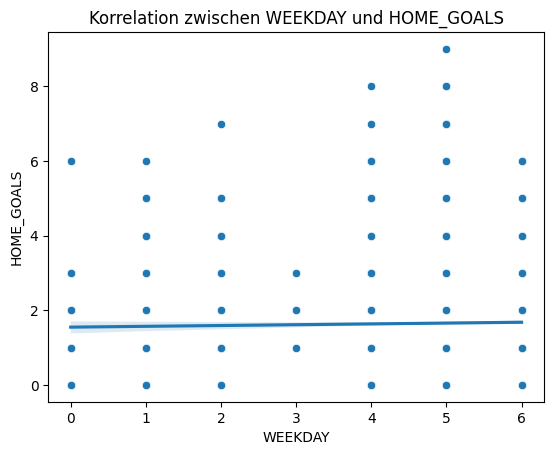

Pearson-Korrelationskoeffizient: 0.01685490547478839
P-Wert: 0.19879418235710294
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen WEEKDAY und 'HOME_GOALS'


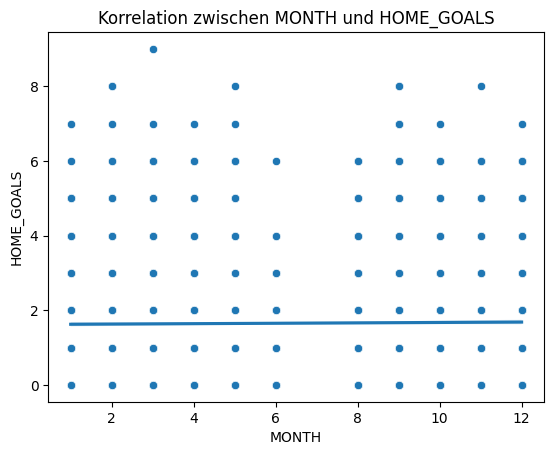

Pearson-Korrelationskoeffizient: 0.014746243860850265
P-Wert: 0.2609220801750521
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen MONTH und 'HOME_GOALS'


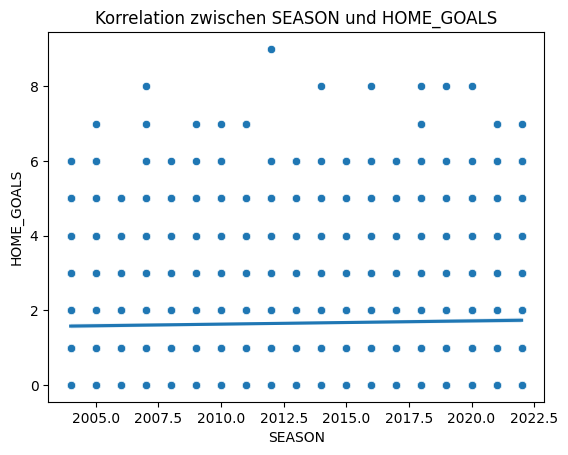

Pearson-Korrelationskoeffizient: 0.03510651072647114
P-Wert: 0.007426099300086386
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen SEASON und 'HOME_GOALS'


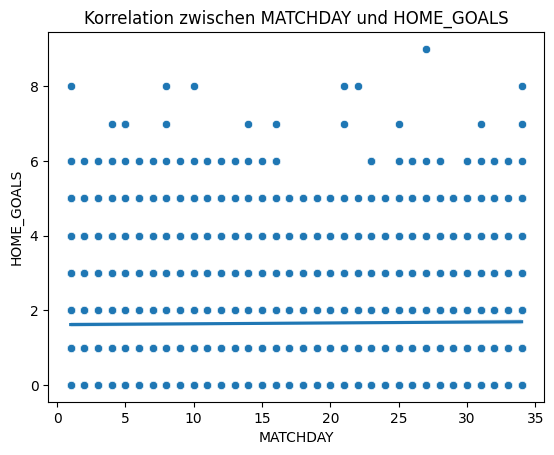

Pearson-Korrelationskoeffizient: 0.0164559289416028
P-Wert: 0.20963381662864808
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen MATCHDAY und 'HOME_GOALS'


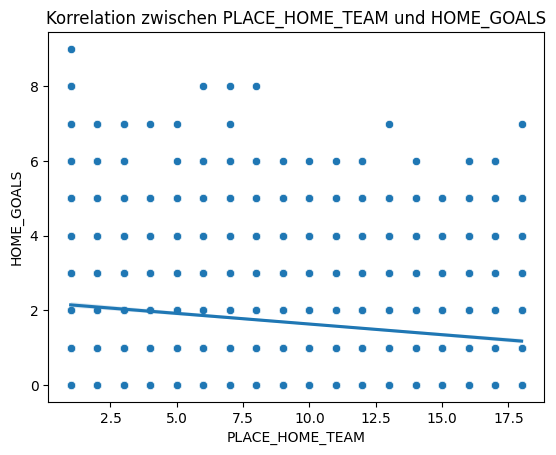

Pearson-Korrelationskoeffizient: -0.2183905244545277
P-Wert: 1.0070629507167261e-63
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen PLACE_HOME_TEAM und 'HOME_GOALS'


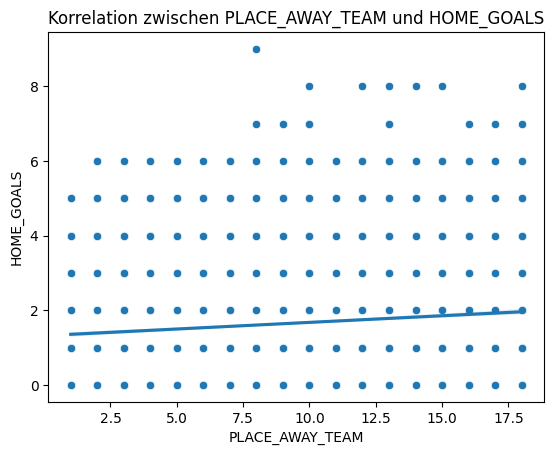

Pearson-Korrelationskoeffizient: 0.1359662749202473
P-Wert: 2.1508422718477174e-25
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen PLACE_AWAY_TEAM und 'HOME_GOALS'


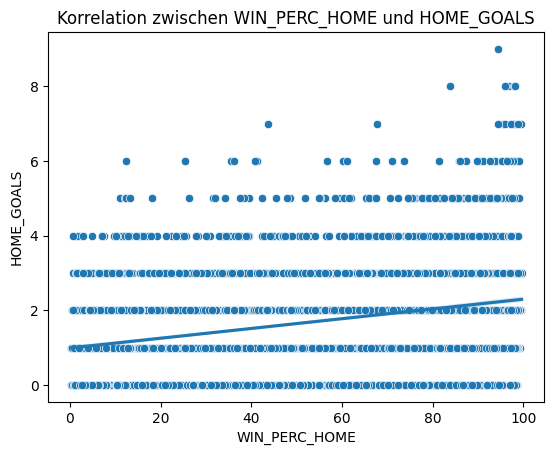

Pearson-Korrelationskoeffizient: 0.31117040471730345
P-Wert: 7.901811799458652e-97
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen WIN_PERC_HOME und 'HOME_GOALS'


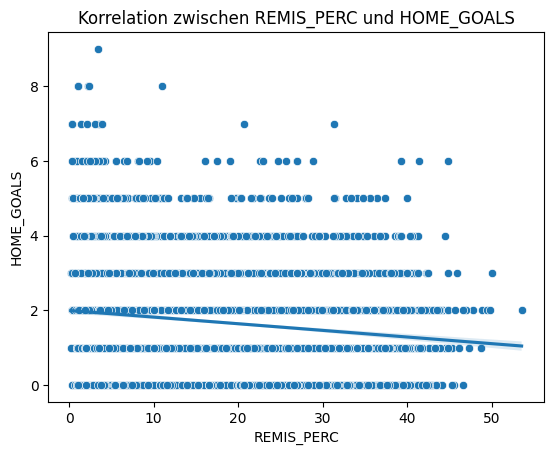

Pearson-Korrelationskoeffizient: -0.15044692824337944
P-Wert: 4.137080649490566e-23
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen REMIS_PERC und 'HOME_GOALS'


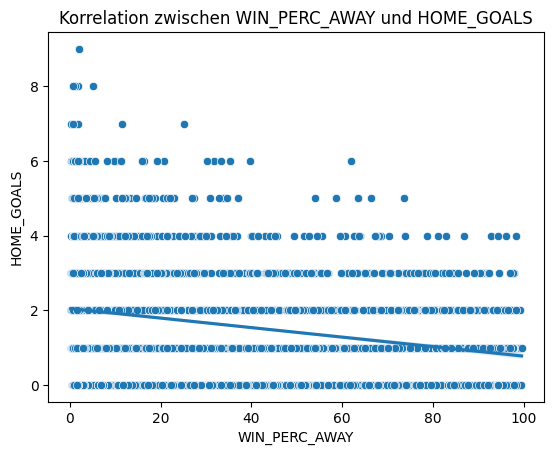

Pearson-Korrelationskoeffizient: -0.27949228516323515
P-Wert: 1.0244872355535092e-77
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen WIN_PERC_AWAY und 'HOME_GOALS'


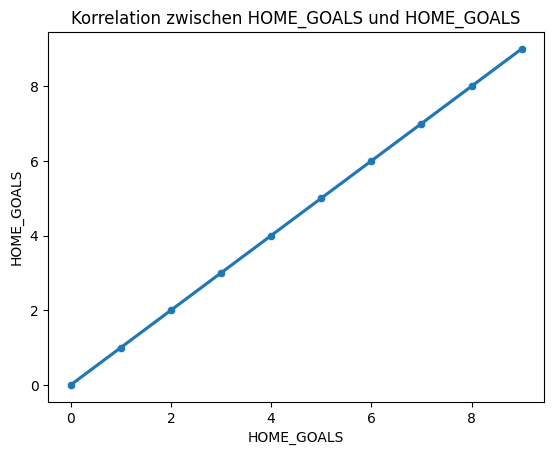

Pearson-Korrelationskoeffizient: 0.9999999999999817
P-Wert: 0.0
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_GOALS und 'HOME_GOALS'


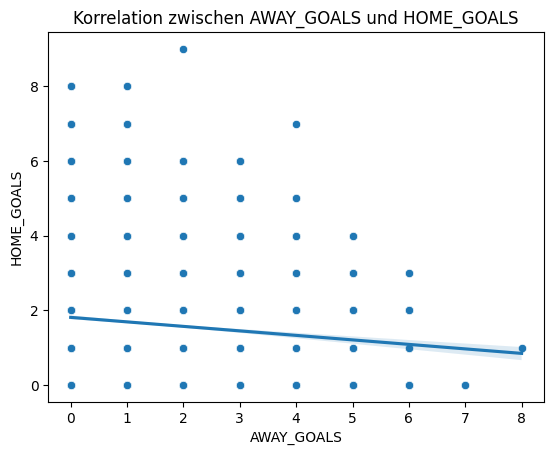

Pearson-Korrelationskoeffizient: -0.10677157600817709
P-Wert: 3.271264816059597e-16
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_GOALS und 'HOME_GOALS'


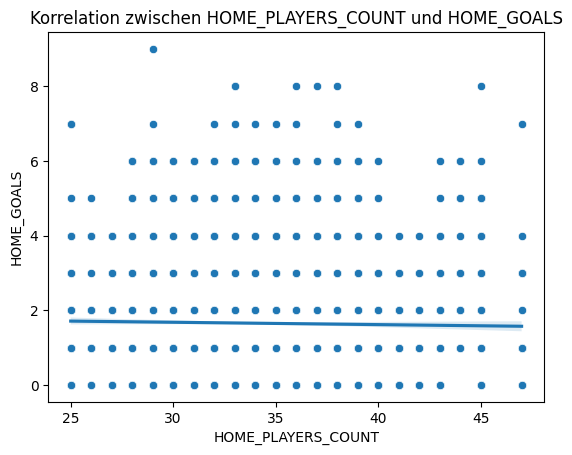

Pearson-Korrelationskoeffizient: -0.017182899726690338
P-Wert: 0.1901944652470318
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_PLAYERS_COUNT und 'HOME_GOALS'


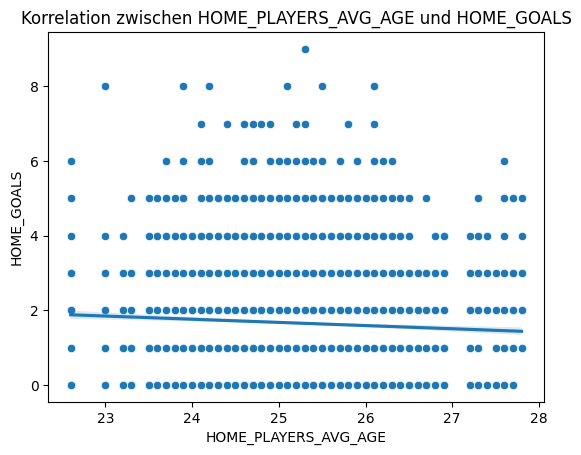

Pearson-Korrelationskoeffizient: -0.0573079805159576
P-Wert: 1.2290844556865314e-05
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_PLAYERS_AVG_AGE und 'HOME_GOALS'


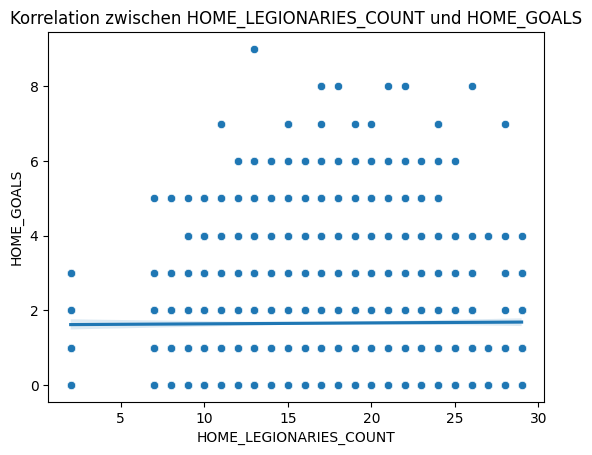

Pearson-Korrelationskoeffizient: 0.00744800247807547
P-Wert: 0.5701756015480158
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_LEGIONARIES_COUNT und 'HOME_GOALS'


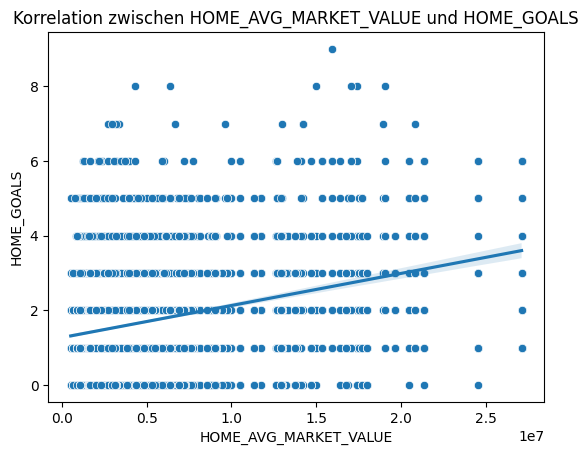

Pearson-Korrelationskoeffizient: 0.28361477720379724
P-Wert: 5.4139745830137785e-108
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_AVG_MARKET_VALUE und 'HOME_GOALS'


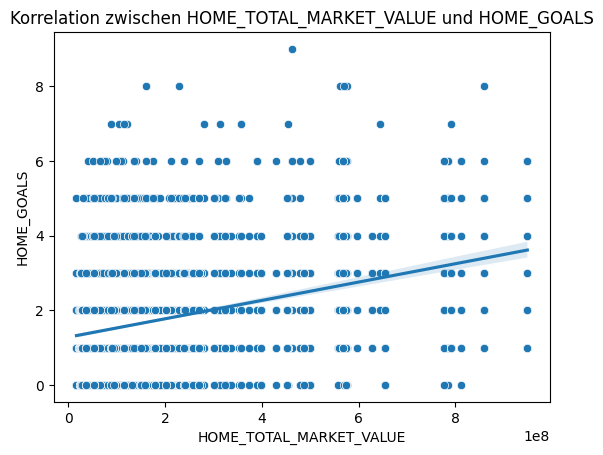

Pearson-Korrelationskoeffizient: 0.28042139089657364
P-Wert: 1.61452056649634e-105
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_TOTAL_MARKET_VALUE und 'HOME_GOALS'


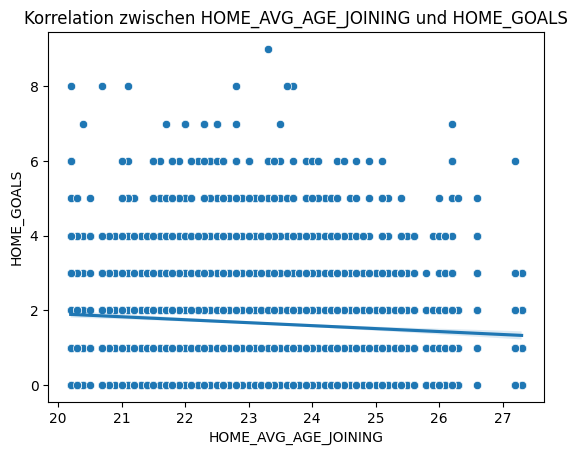

Pearson-Korrelationskoeffizient: -0.07799200942822991
P-Wert: 2.606266304055411e-09
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_AVG_AGE_JOINING und 'HOME_GOALS'


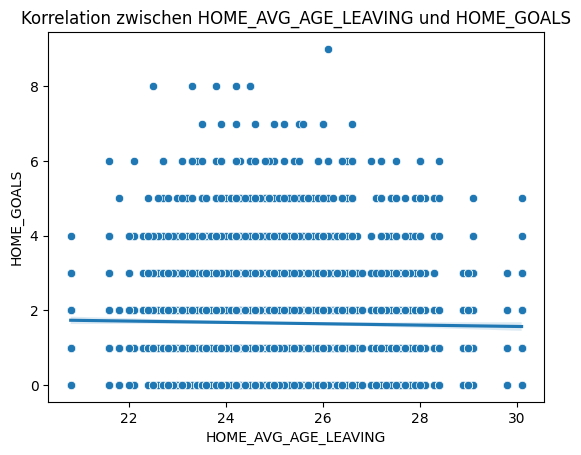

Pearson-Korrelationskoeffizient: -0.020638253948932032
P-Wert: 0.11560595430212857
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_AVG_AGE_LEAVING und 'HOME_GOALS'


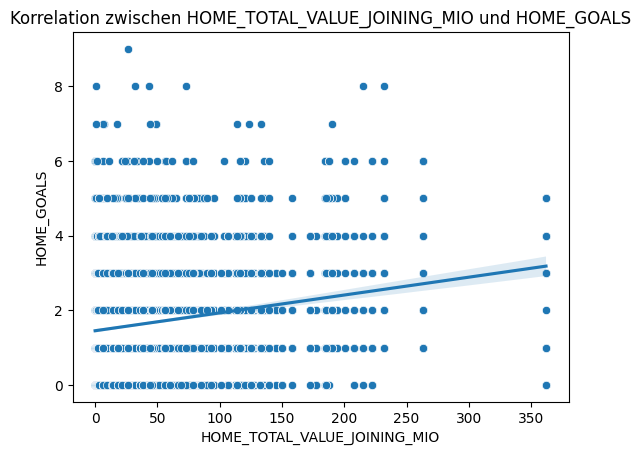

Pearson-Korrelationskoeffizient: 0.18856457666192095
P-Wert: 9.133486388848014e-42
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_TOTAL_VALUE_JOINING_MIO und 'HOME_GOALS'


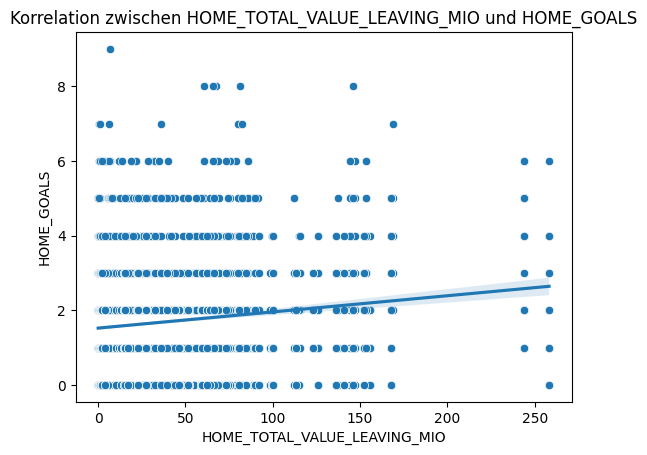

Pearson-Korrelationskoeffizient: 0.1359045564867087
P-Wert: 2.2894933117520092e-20
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_TOTAL_VALUE_LEAVING_MIO und 'HOME_GOALS'


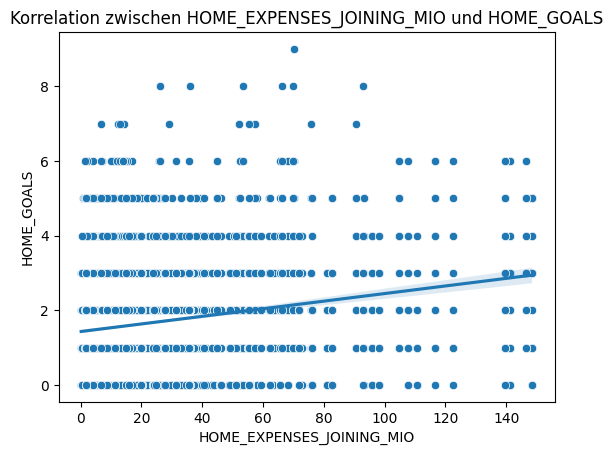

Pearson-Korrelationskoeffizient: 0.2011420768618063
P-Wert: 2.278936250093285e-53
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_EXPENSES_JOINING_MIO und 'HOME_GOALS'


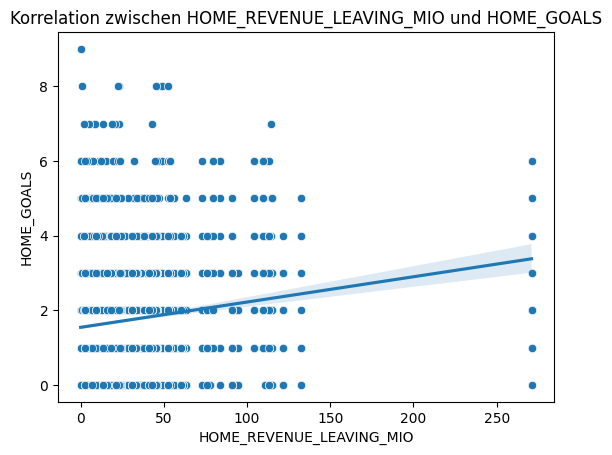

Pearson-Korrelationskoeffizient: 0.13839130552323675
P-Wert: 4.18488086327003e-25
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen HOME_REVENUE_LEAVING_MIO und 'HOME_GOALS'


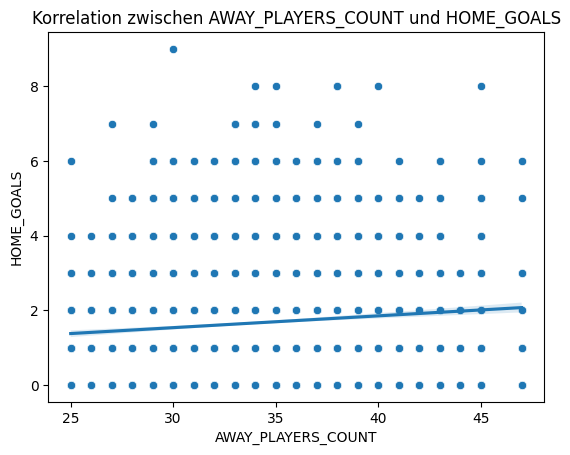

Pearson-Korrelationskoeffizient: 0.08649276641037999
P-Wert: 3.94837434582062e-11
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_PLAYERS_COUNT und 'HOME_GOALS'


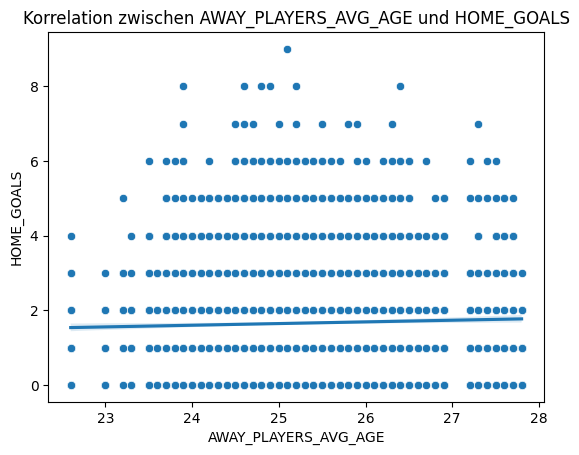

Pearson-Korrelationskoeffizient: 0.03017116405829789
P-Wert: 0.021416065434486754
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_PLAYERS_AVG_AGE und 'HOME_GOALS'


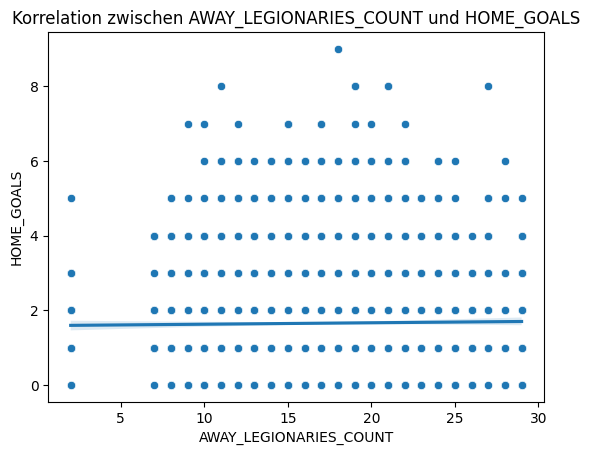

Pearson-Korrelationskoeffizient: 0.011417985690004916
P-Wert: 0.38405021587598986
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_LEGIONARIES_COUNT und 'HOME_GOALS'


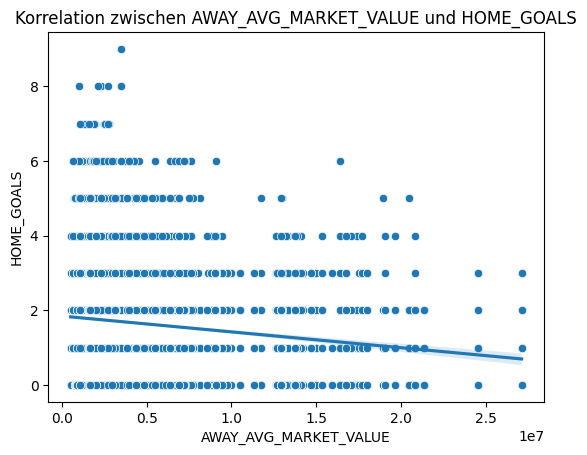

Pearson-Korrelationskoeffizient: -0.13988695385574293
P-Wert: 8.492642497821591e-27
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_AVG_MARKET_VALUE und 'HOME_GOALS'


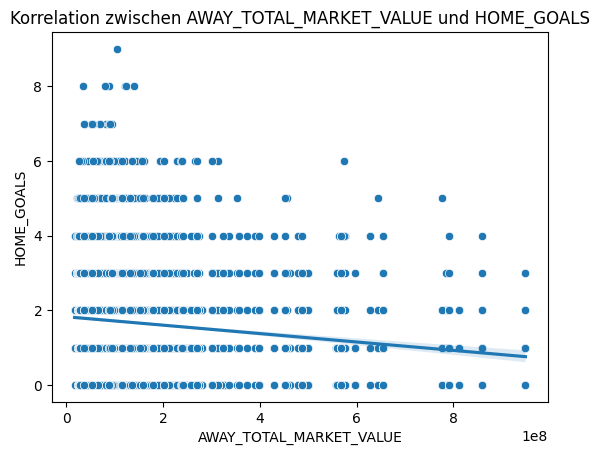

Pearson-Korrelationskoeffizient: -0.12846608223953096
P-Wert: 8.024065445669187e-23
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_TOTAL_MARKET_VALUE und 'HOME_GOALS'


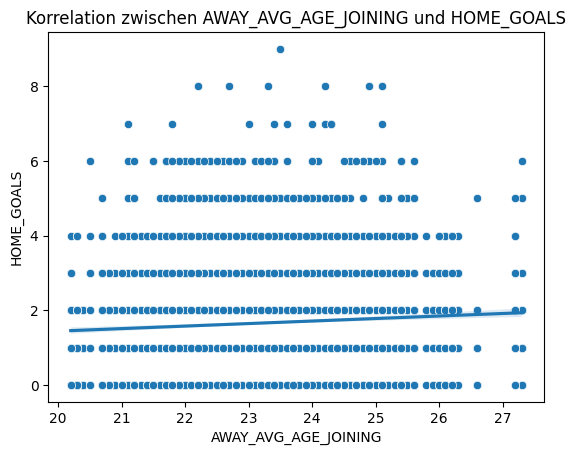

Pearson-Korrelationskoeffizient: 0.06645136158722313
P-Wert: 3.9488840034365024e-07
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_AVG_AGE_JOINING und 'HOME_GOALS'


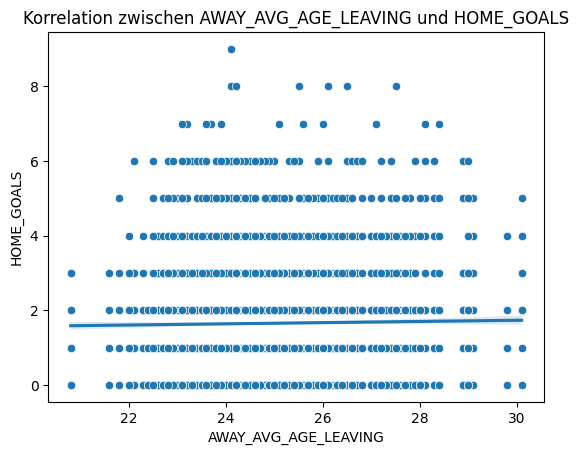

Pearson-Korrelationskoeffizient: 0.018143160014746817
P-Wert: 0.1665959175096202
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_AVG_AGE_LEAVING und 'HOME_GOALS'


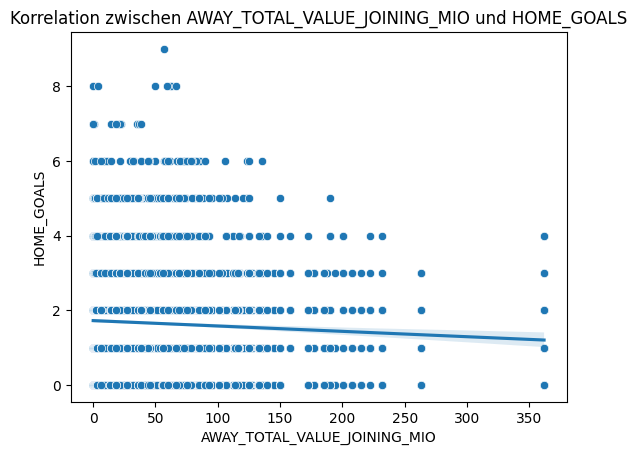

Pearson-Korrelationskoeffizient: -0.056741662037349816
P-Wert: 5.3247731615063454e-05
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_TOTAL_VALUE_JOINING_MIO und 'HOME_GOALS'


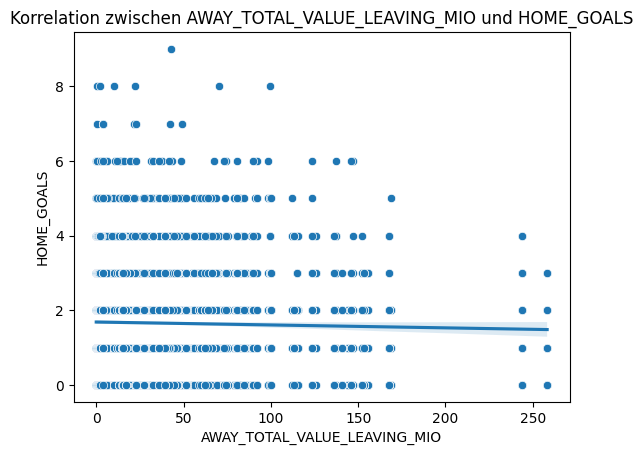

Pearson-Korrelationskoeffizient: -0.024379867936467795
P-Wert: 0.0986323610408185
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_TOTAL_VALUE_LEAVING_MIO und 'HOME_GOALS'


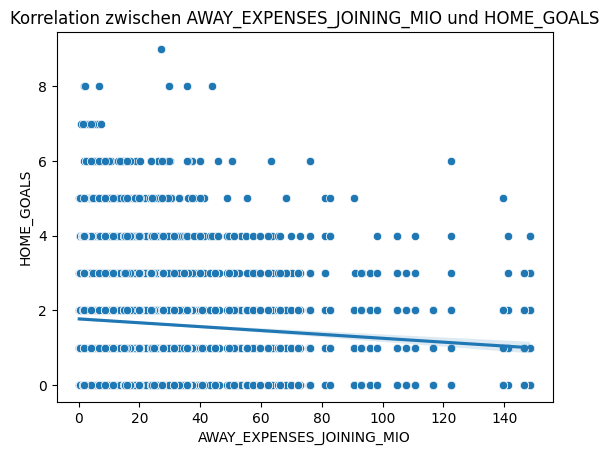

Pearson-Korrelationskoeffizient: -0.10276571868183364
P-Wert: 6.3242422565430805e-15
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_EXPENSES_JOINING_MIO und 'HOME_GOALS'


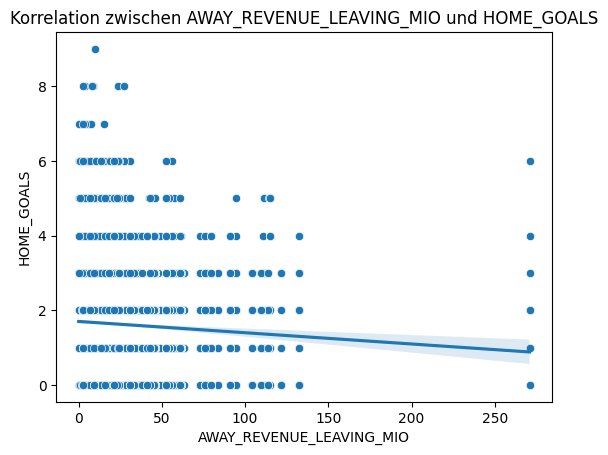

Pearson-Korrelationskoeffizient: -0.06198382930456041
P-Wert: 3.879016338832926e-06
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AWAY_REVENUE_LEAVING_MIO und 'HOME_GOALS'


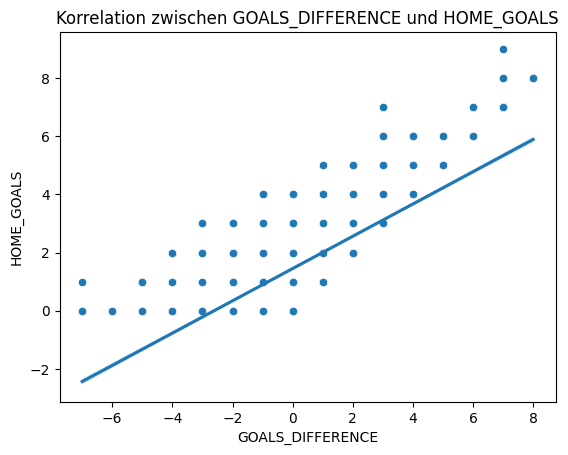

Pearson-Korrelationskoeffizient: 0.7792057618663468
P-Wert: 0.0
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen GOALS_DIFFERENCE und 'HOME_GOALS'


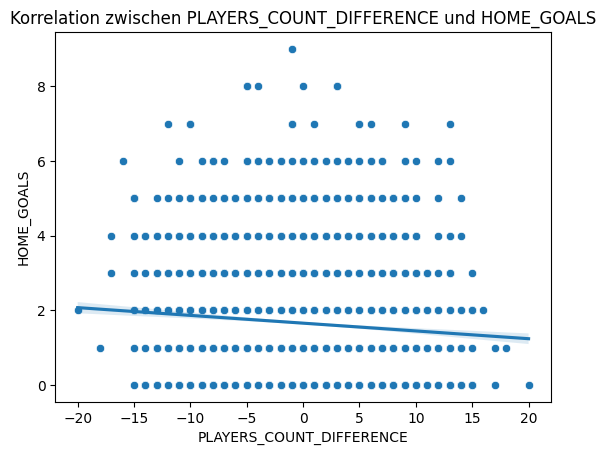

Pearson-Korrelationskoeffizient: -0.07684367397502352
P-Wert: 4.445150057501032e-09
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen PLAYERS_COUNT_DIFFERENCE und 'HOME_GOALS'


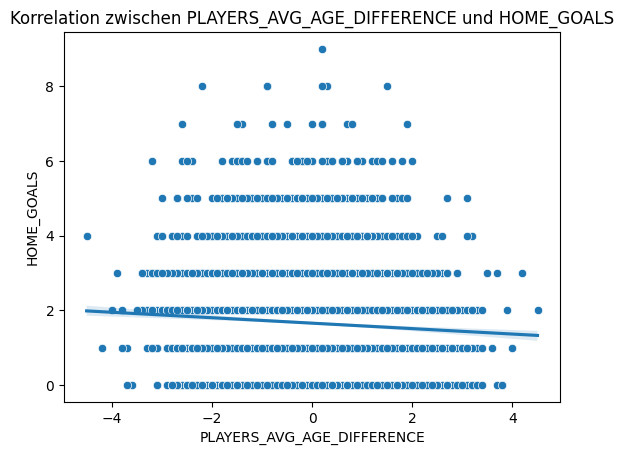

Pearson-Korrelationskoeffizient: -0.06559462583846065
P-Wert: 5.560756753209854e-07
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen PLAYERS_AVG_AGE_DIFFERENCE und 'HOME_GOALS'


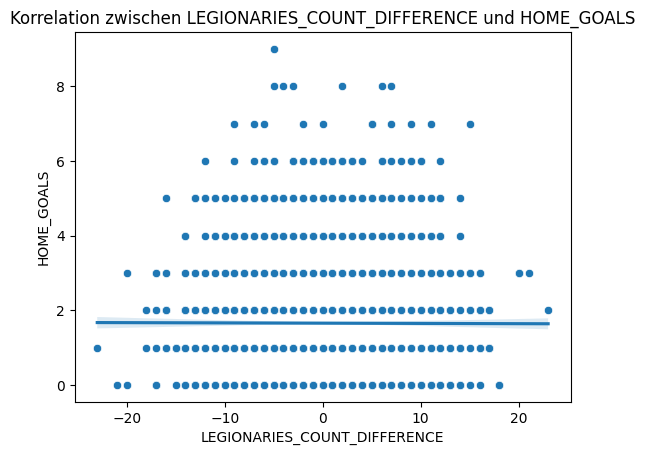

Pearson-Korrelationskoeffizient: -0.0028577519112036134
P-Wert: 0.8275413078502547
Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen LEGIONARIES_COUNT_DIFFERENCE und 'HOME_GOALS'


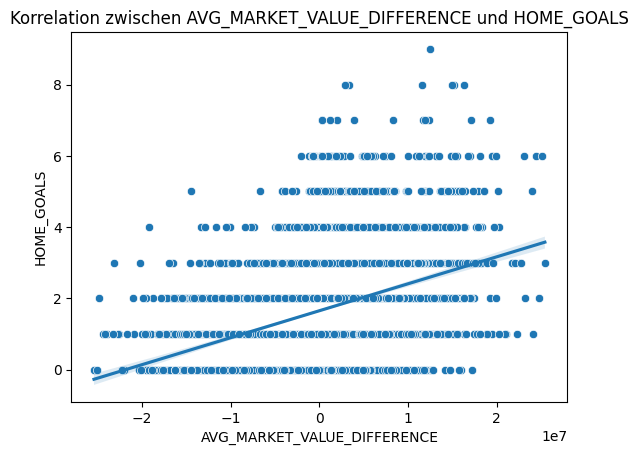

Pearson-Korrelationskoeffizient: 0.32507829113572245
P-Wert: 3.5598027316488372e-143
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AVG_MARKET_VALUE_DIFFERENCE und 'HOME_GOALS'


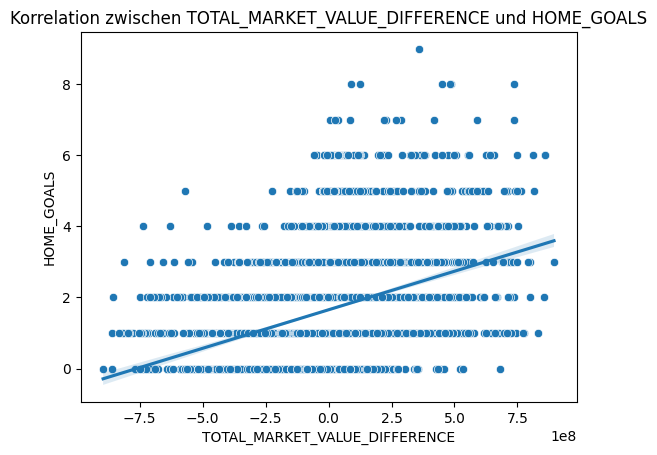

Pearson-Korrelationskoeffizient: 0.31820638205557633
P-Wert: 6.07571965407485e-137
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen TOTAL_MARKET_VALUE_DIFFERENCE und 'HOME_GOALS'


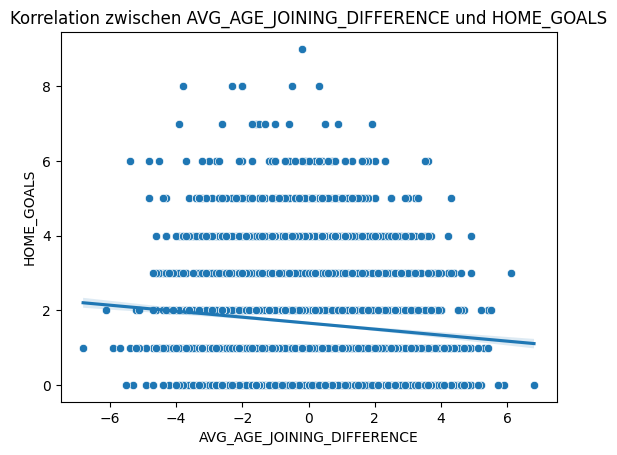

Pearson-Korrelationskoeffizient: -0.10693733789165993
P-Wert: 2.943312309896147e-16
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AVG_AGE_JOINING_DIFFERENCE und 'HOME_GOALS'


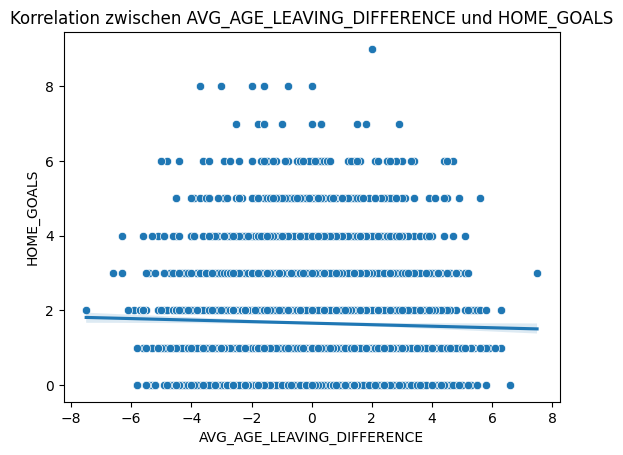

Pearson-Korrelationskoeffizient: -0.03012793816085093
P-Wert: 0.021603347295343255
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen AVG_AGE_LEAVING_DIFFERENCE und 'HOME_GOALS'


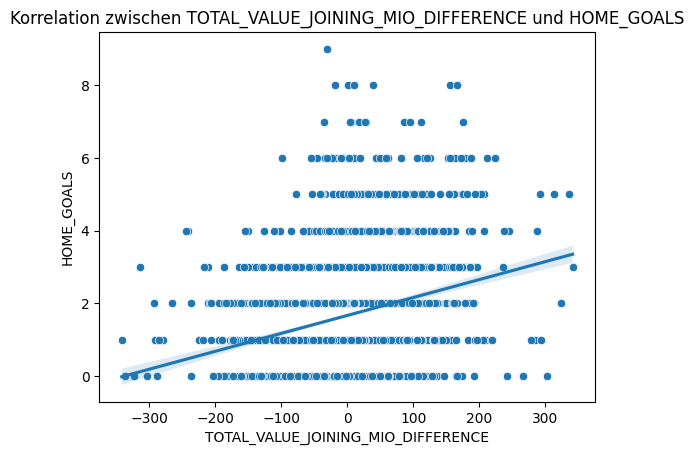

Pearson-Korrelationskoeffizient: 0.226308921188831
P-Wert: 4.144666197102699e-56
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen TOTAL_VALUE_JOINING_MIO_DIFFERENCE und 'HOME_GOALS'


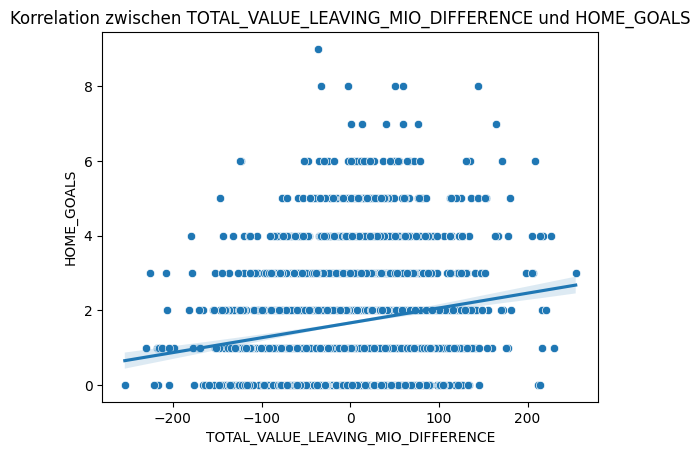

Pearson-Korrelationskoeffizient: 0.14906161653929945
P-Wert: 1.827017590669849e-22
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen TOTAL_VALUE_LEAVING_MIO_DIFFERENCE und 'HOME_GOALS'


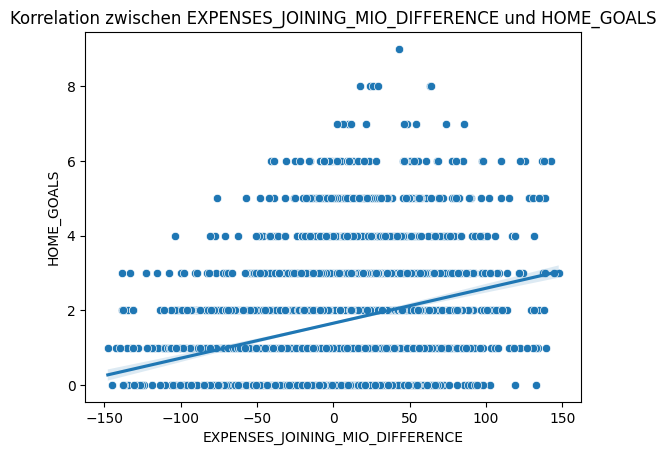

Pearson-Korrelationskoeffizient: 0.23632029620911452
P-Wert: 1.6617205318679728e-72
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen EXPENSES_JOINING_MIO_DIFFERENCE und 'HOME_GOALS'


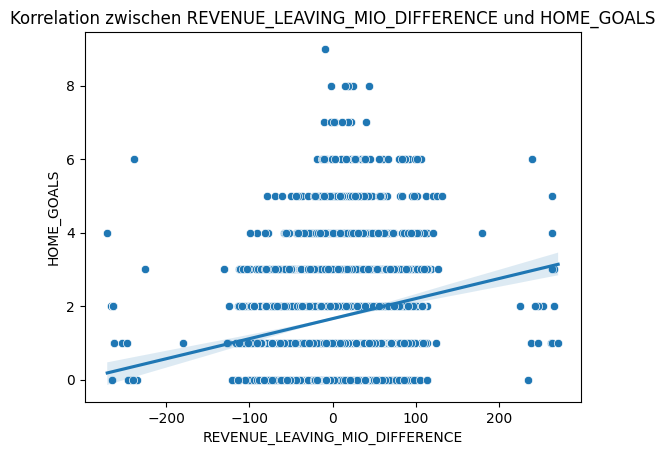

Pearson-Korrelationskoeffizient: 0.14786161907770656
P-Wert: 3.403537708897916e-27
Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen REVENUE_LEAVING_MIO_DIFFERENCE und 'HOME_GOALS'


In [51]:
for num_cat in df_num_var_list:
    # Pearson-Korrelationskoeffizient berechnen
    df_new = df.copy()
    df_new = df_new.dropna(subset=[num_cat, 'HOME_GOALS'])
    correlation_coefficient, p_value = pearsonr(df_new[num_cat], df_new['HOME_GOALS'])

    # Scatterplot mit Korrelationskoeffizienten anzeigen
    sns.scatterplot(x=num_cat, y='HOME_GOALS', data=df_new)

    # Optional: Trendlinie hinzufügen
    sns.regplot(x=num_cat, y='HOME_GOALS', data=df_new, scatter=False)

    plt.xlabel(num_cat)
    plt.ylabel('HOME_GOALS')
    plt.title(f'Korrelation zwischen {num_cat} und HOME_GOALS')

    plt.show()

    # Ergebnisse ausgeben
    if p_value < significance_level:
        print(f"Pearson-Korrelationskoeffizient: {correlation_coefficient}")
        print(f"P-Wert: {p_value}")
        print(f"Die Nullhypothese wird abgelehnt (signifikant): Es gibt eine signifikante lineare Abhängigkeit zwischen den beiden Variablen {num_cat} und 'HOME_GOALS'")
    else:
        print(f"Pearson-Korrelationskoeffizient: {correlation_coefficient}")
        print(f"P-Wert: {p_value}")
        print(f"Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Es gibt KEINE signifikante lineare Abhängigkeit zwischen den beiden Variablen {num_cat} und 'HOME_GOALS'")

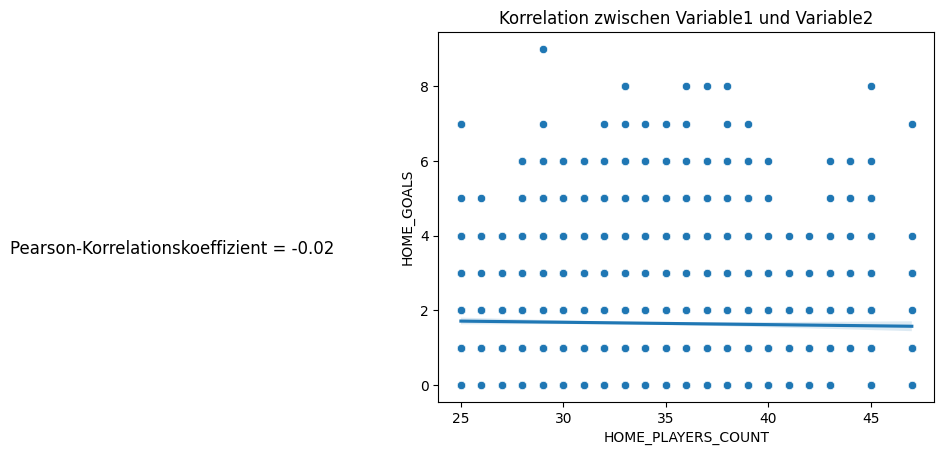

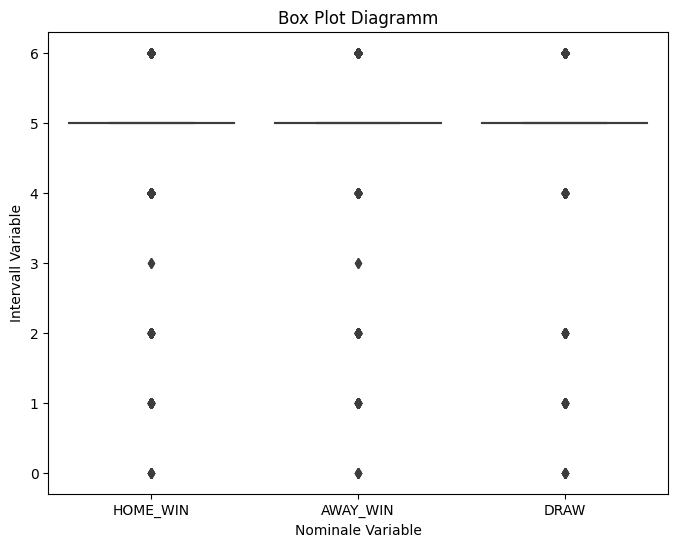

0.036718013423127645
               sum_sq      df         F    PR(>F)
RESULT       7.299819     2.0  3.306368  0.036718
Residual  6414.780677  5811.0       NaN       NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

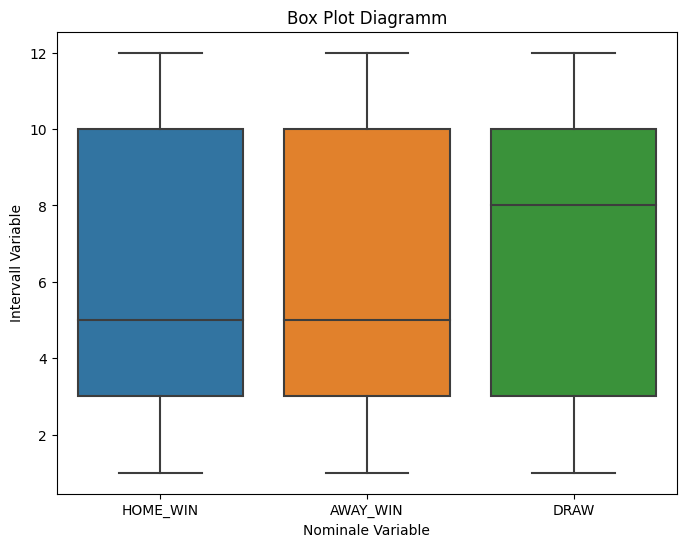

0.3366668147316746
                sum_sq      df         F    PR(>F)
RESULT       30.009939     2.0  1.088865  0.336667
Residual  80077.729999  5811.0       NaN       NaN


'Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von {num_cat}'

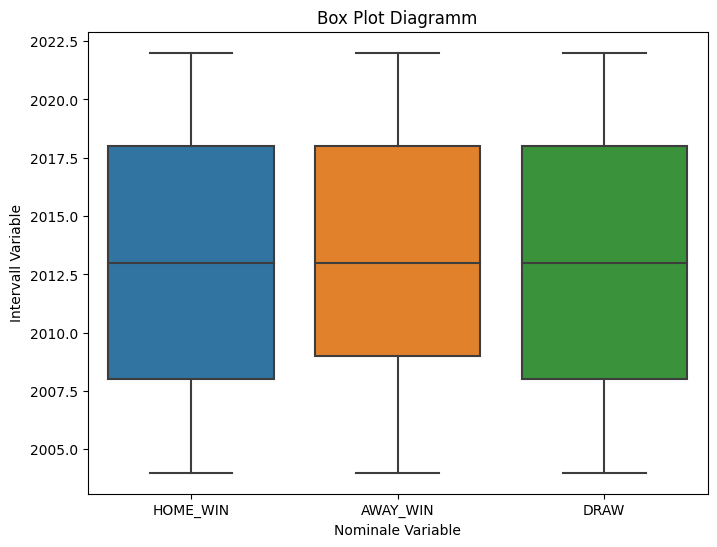

0.5708849083332531
                 sum_sq      df         F    PR(>F)
RESULT        33.648177     2.0  0.560622  0.570885
Residual  174386.351823  5811.0       NaN       NaN


'Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von {num_cat}'

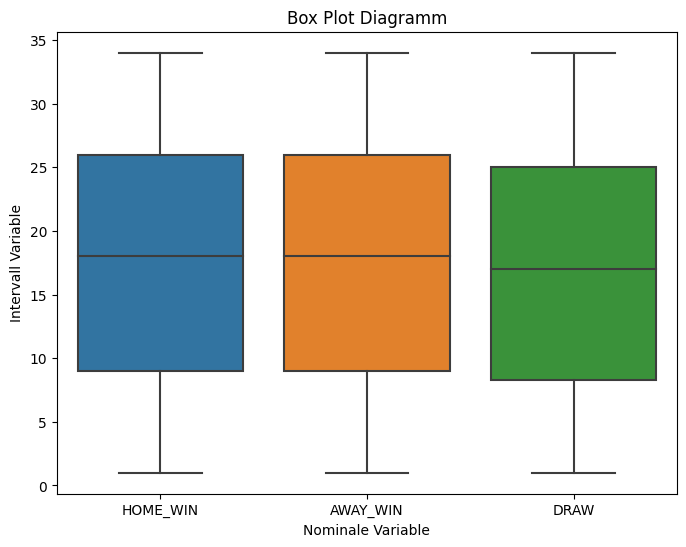

0.15903620419170497
                 sum_sq      df         F    PR(>F)
RESULT       354.005708     2.0  1.839205  0.159036
Residual  559243.494292  5811.0       NaN       NaN


'Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von {num_cat}'

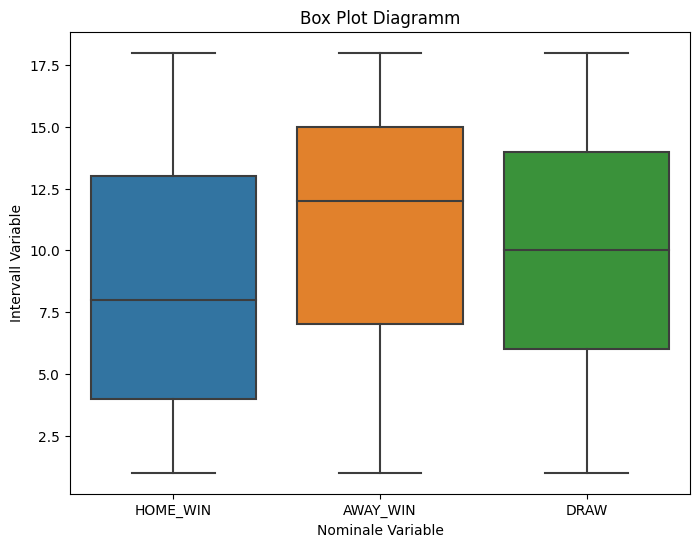

1.2742338454240589e-59
                 sum_sq      df         F        PR(>F)
RESULT      7136.581153     2.0  138.8247  1.274234e-59
Residual  149363.453247  5811.0       NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

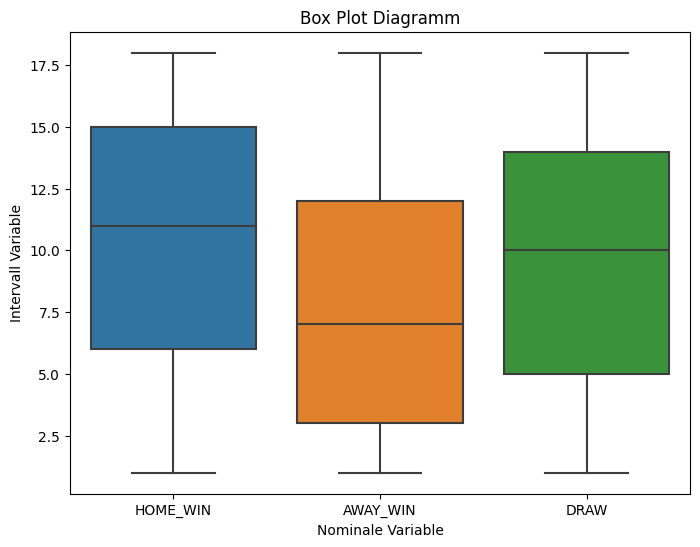

1.7665583488094782e-40
                sum_sq      df          F        PR(>F)
RESULT      4850.51957     2.0  92.991473  1.766558e-40
Residual  151553.51483  5811.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

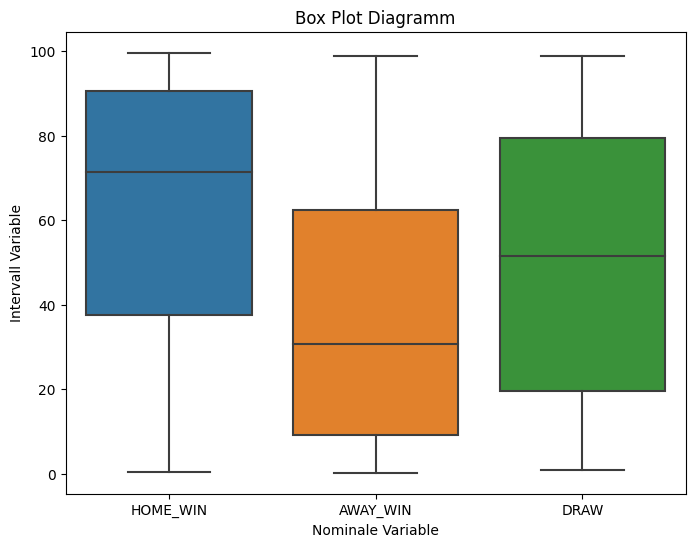

1.835442188945961e-111
                sum_sq      df           F         PR(>F)
RESULT    5.129079e+05     2.0  270.787864  1.835442e-111
Residual  4.054389e+06  4281.0         NaN            NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

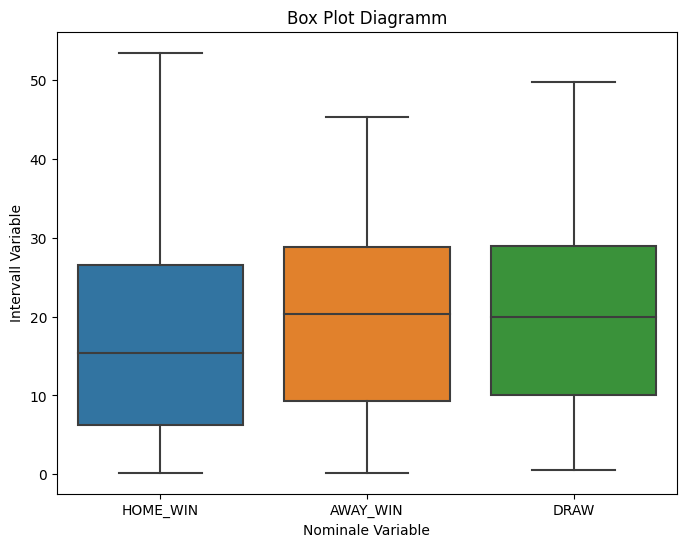

5.985164505786829e-14
                 sum_sq      df          F        PR(>F)
RESULT      8151.101212     2.0  30.664479  5.985165e-14
Residual  568978.587351  4281.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

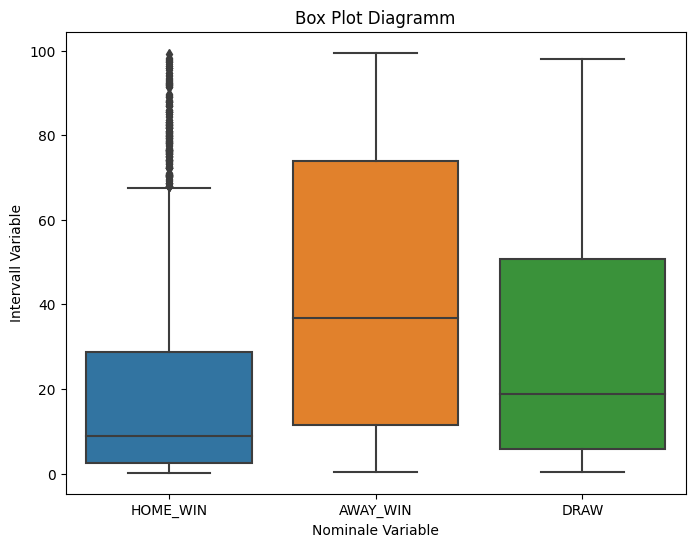

2.1788027990186258e-104
                sum_sq      df           F         PR(>F)
RESULT    4.096482e+05     2.0  252.507182  2.178803e-104
Residual  3.472582e+06  4281.0         NaN            NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

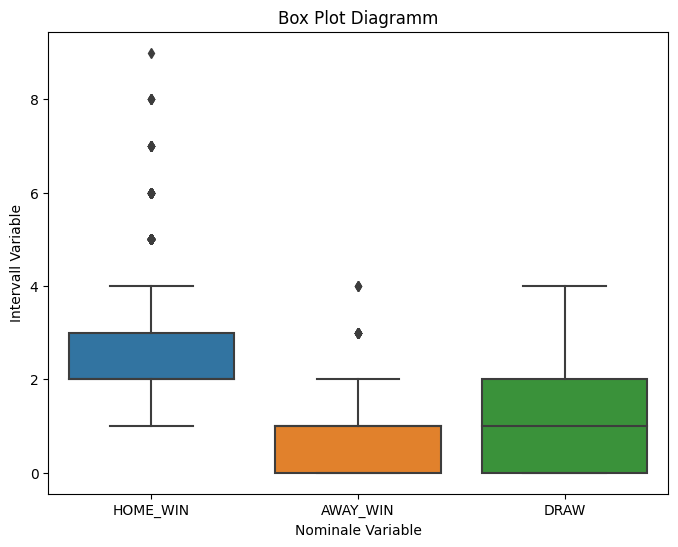

0.0
               sum_sq      df            F  PR(>F)
RESULT    4632.463949     2.0  2226.702365     0.0
Residual  6044.644410  5811.0          NaN     NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

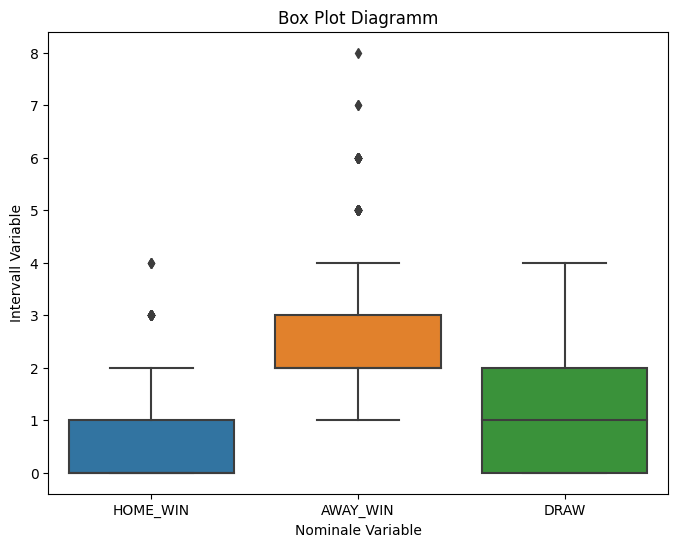

0.0
               sum_sq      df            F  PR(>F)
RESULT    3729.626878     2.0  2334.439229     0.0
Residual  4641.984577  5811.0          NaN     NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

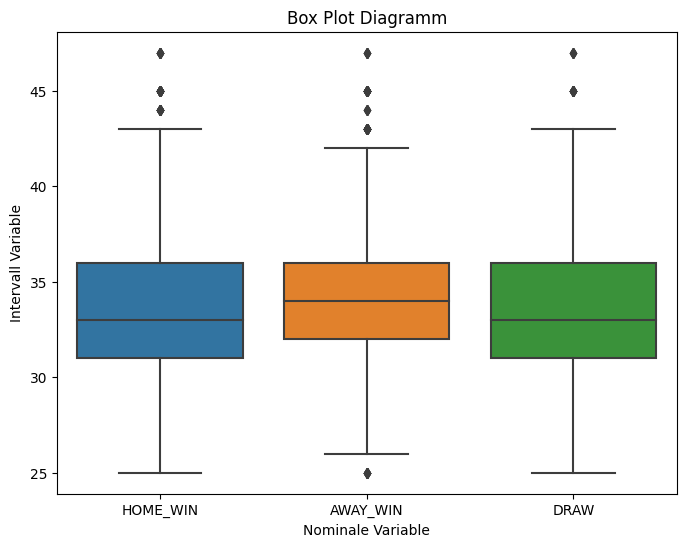

3.748035930295584e-05
                sum_sq      df          F    PR(>F)
RESULT      279.933731     2.0  10.209589  0.000037
Residual  79665.051649  5811.0        NaN       NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

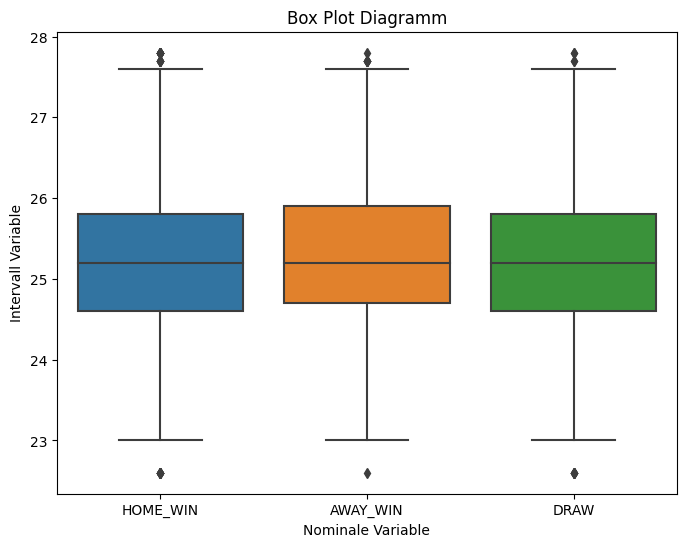

0.0373345793236691
              sum_sq      df         F    PR(>F)
RESULT       5.48843     2.0  3.289696  0.037335
Residual  4847.44888  5811.0       NaN       NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

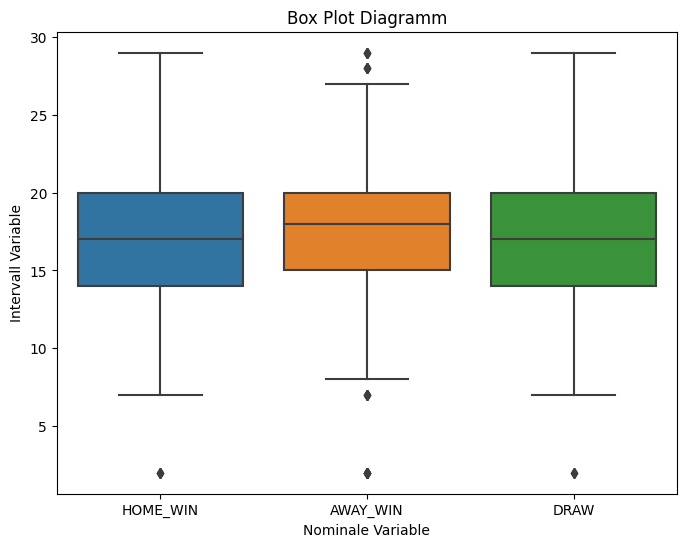

0.4176507153840989
                sum_sq      df         F    PR(>F)
RESULT       28.346069     2.0  0.873241  0.417651
Residual  94314.744575  5811.0       NaN       NaN


'Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von {num_cat}'

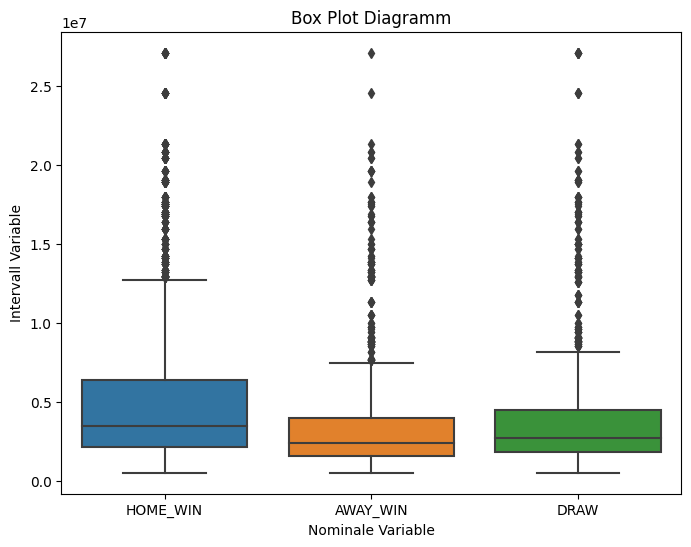

1.4612938209681939e-56
                sum_sq      df           F        PR(>F)
RESULT    5.030260e+15     2.0  131.452311  1.461294e-56
Residual  1.111842e+17  5811.0         NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

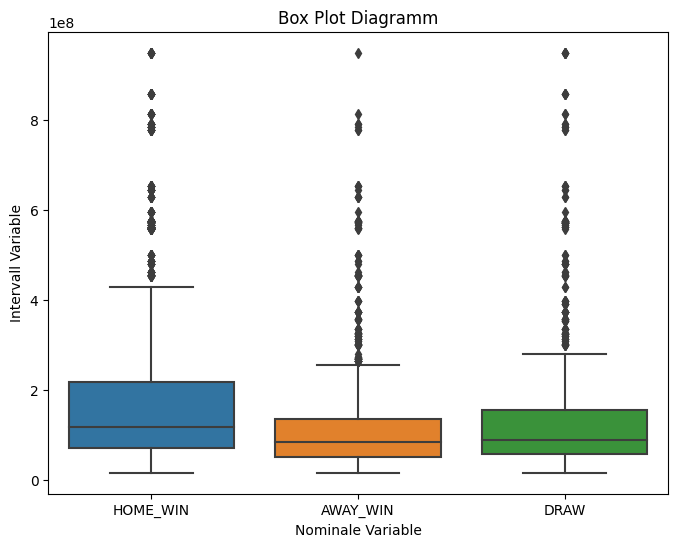

7.70968435594738e-51
                sum_sq      df           F        PR(>F)
RESULT    5.410744e+18     2.0  117.711292  7.709684e-51
Residual  1.335549e+20  5811.0         NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

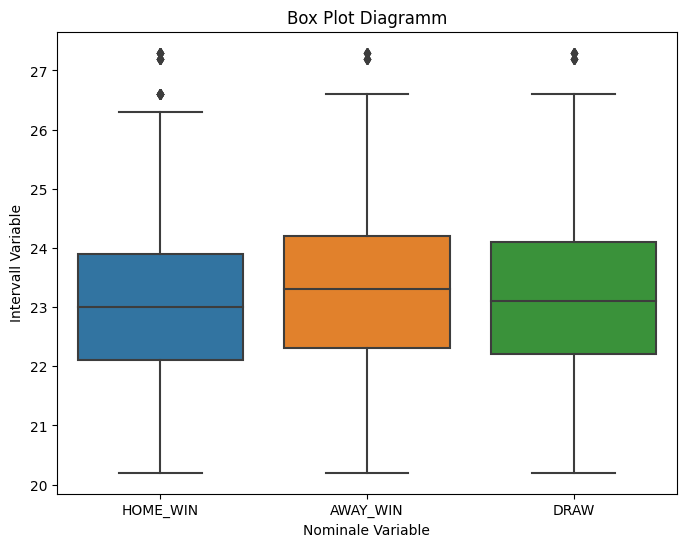

8.549625399323022e-08
                sum_sq      df          F        PR(>F)
RESULT       57.847997     2.0  16.320459  8.549625e-08
Residual  10298.567909  5811.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

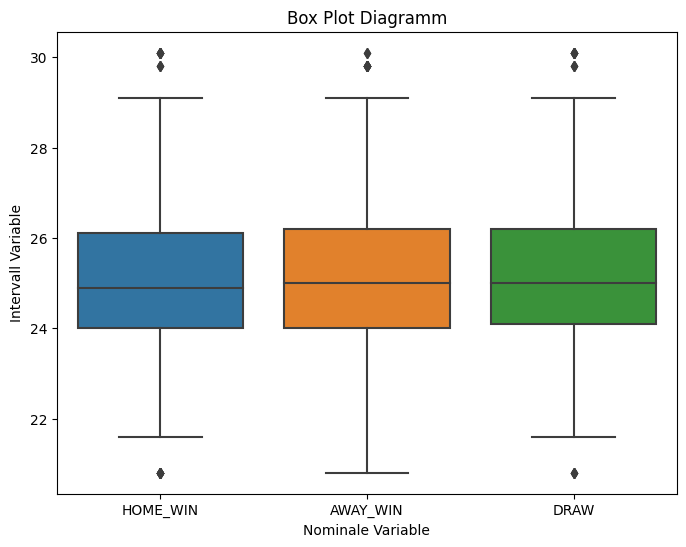

0.03418470529020349
                sum_sq      df         F    PR(>F)
RESULT       16.219922     2.0  3.377939  0.034185
Residual  13951.401598  5811.0       NaN       NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

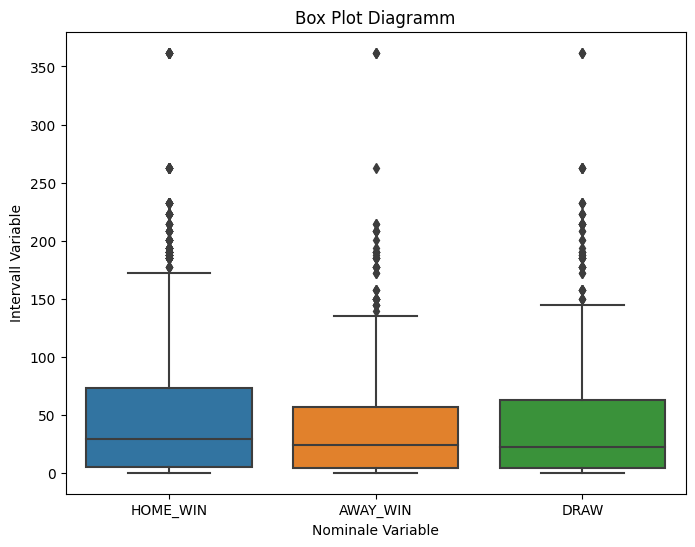

3.3949794665500765e-15
                sum_sq      df          F        PR(>F)
RESULT    1.925607e+05     2.0  33.536679  3.394979e-15
Residual  1.453535e+07  5063.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

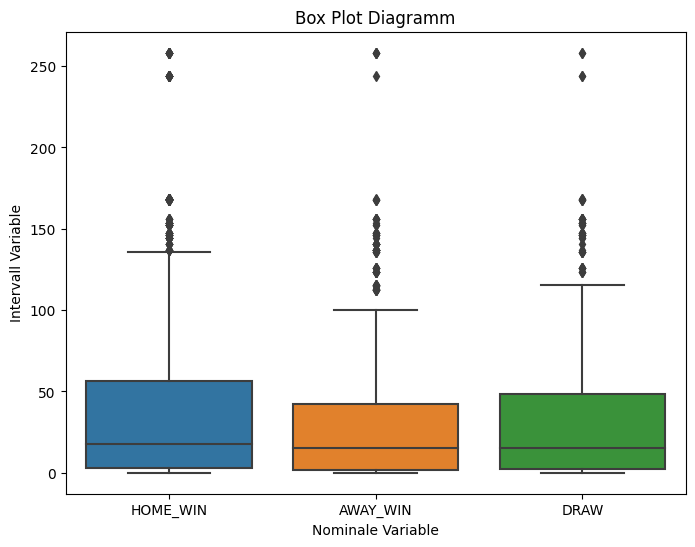

1.947908258001851e-06
                sum_sq      df          F    PR(>F)
RESULT    4.779697e+04     2.0  13.186518  0.000002
Residual  8.313214e+06  4587.0        NaN       NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

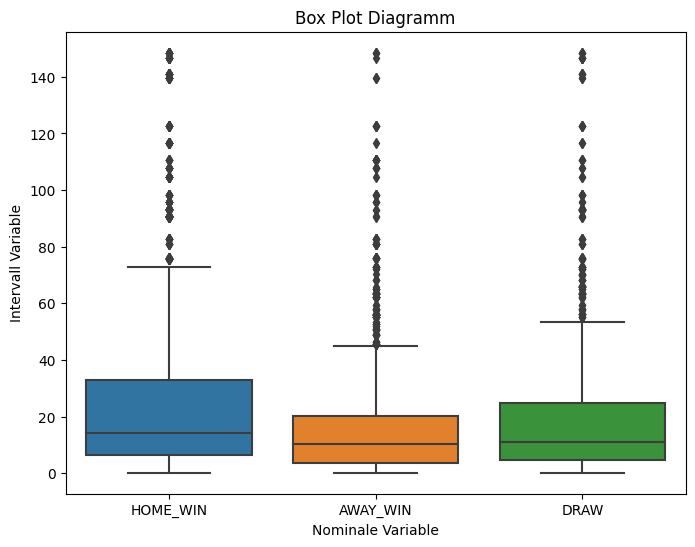

3.846595596306292e-27
                sum_sq      df          F        PR(>F)
RESULT    8.662520e+04     2.0  61.473277  3.846596e-27
Residual  4.034402e+06  5726.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

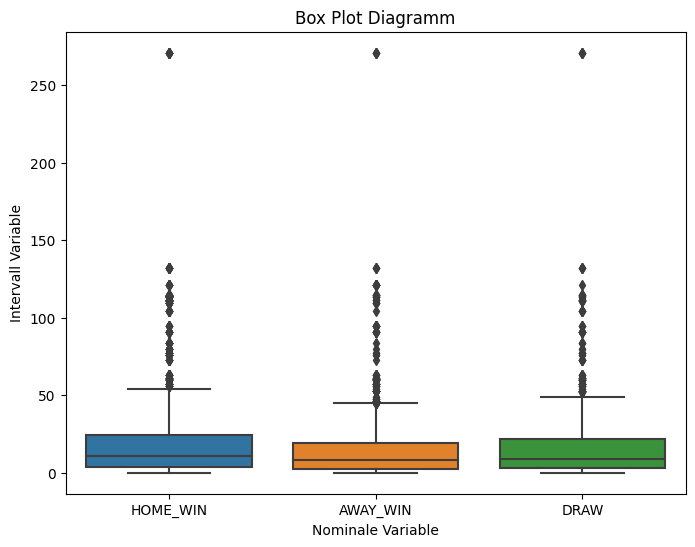

1.0088192559271883e-09
                sum_sq      df          F        PR(>F)
RESULT    3.183797e+04     2.0  20.792146  1.008819e-09
Residual  4.240797e+06  5539.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

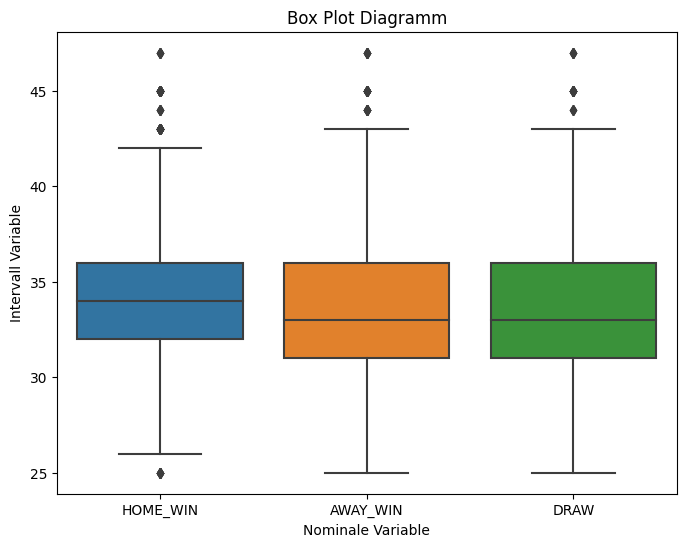

0.00012994753969652924
               sum_sq      df         F   PR(>F)
RESULT      245.83638     2.0  8.962174  0.00013
Residual  79699.14900  5811.0       NaN      NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

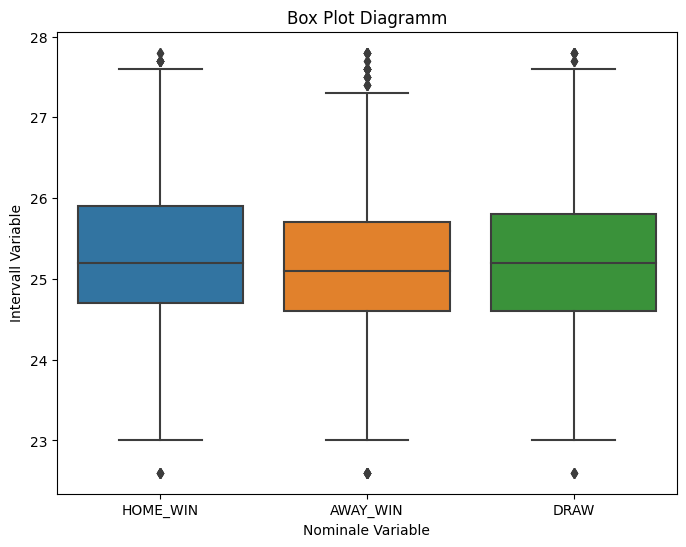

1.7582207074038257e-05
               sum_sq      df          F    PR(>F)
RESULT      18.252624     2.0  10.969278  0.000018
Residual  4834.684686  5811.0        NaN       NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

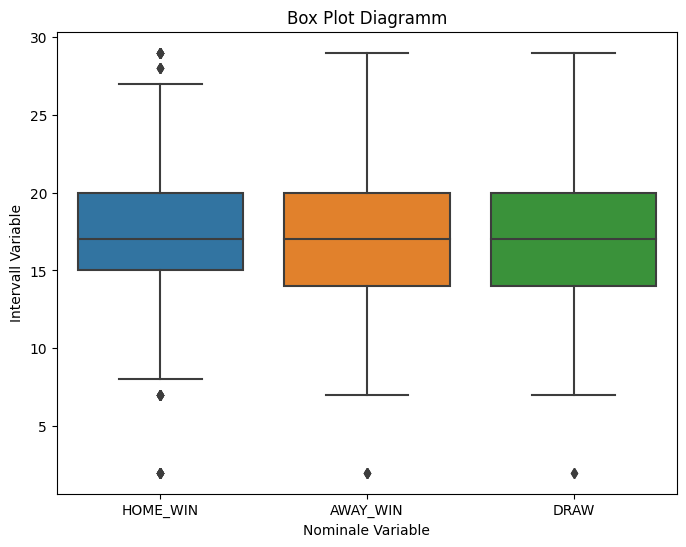

0.6648243605740096
                sum_sq      df         F    PR(>F)
RESULT       13.254586     2.0  0.408261  0.664824
Residual  94329.836057  5811.0       NaN       NaN


'Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von {num_cat}'

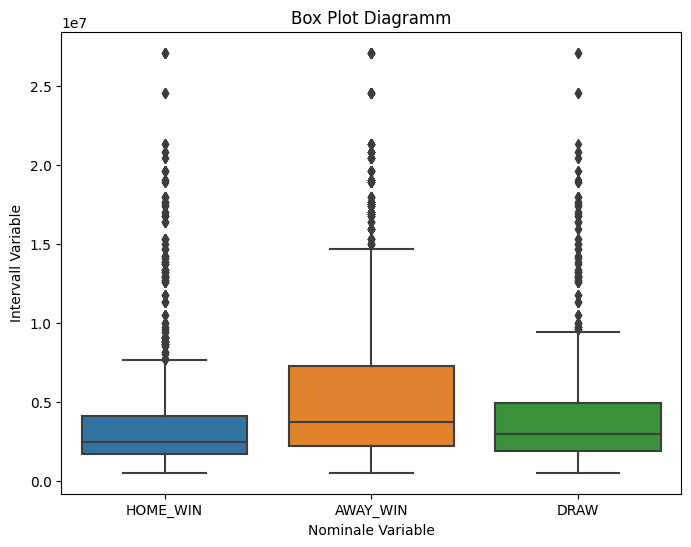

6.062695994694477e-71
                sum_sq      df           F        PR(>F)
RESULT    6.290307e+15     2.0  166.264518  6.062696e-71
Residual  1.099242e+17  5811.0         NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

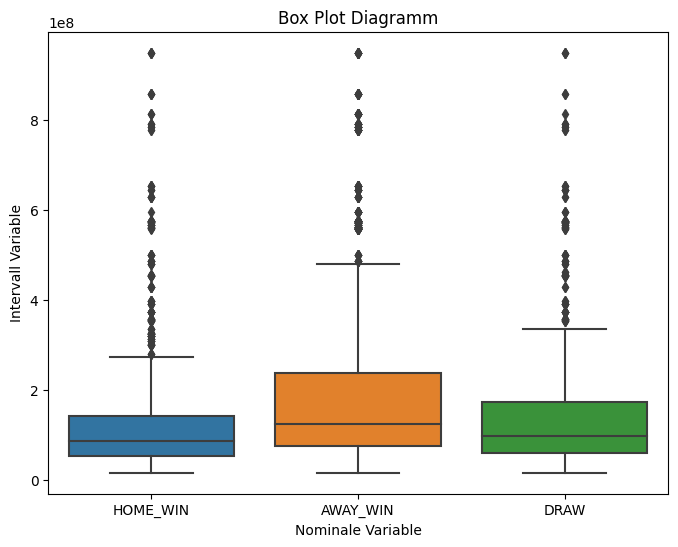

7.061347424605565e-66
                sum_sq      df           F        PR(>F)
RESULT    6.992952e+18     2.0  153.956295  7.061347e-66
Residual  1.319727e+20  5811.0         NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

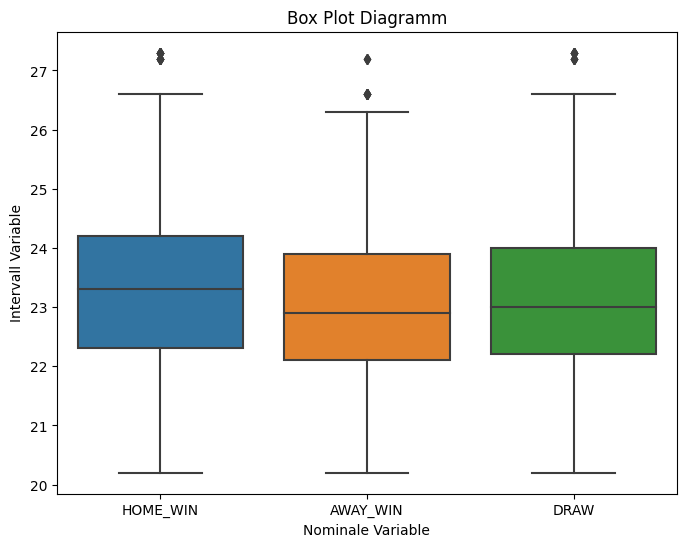

8.080658191589191e-11
                sum_sq      df          F        PR(>F)
RESULT       82.502992     2.0  23.332147  8.080658e-11
Residual  10273.912915  5811.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

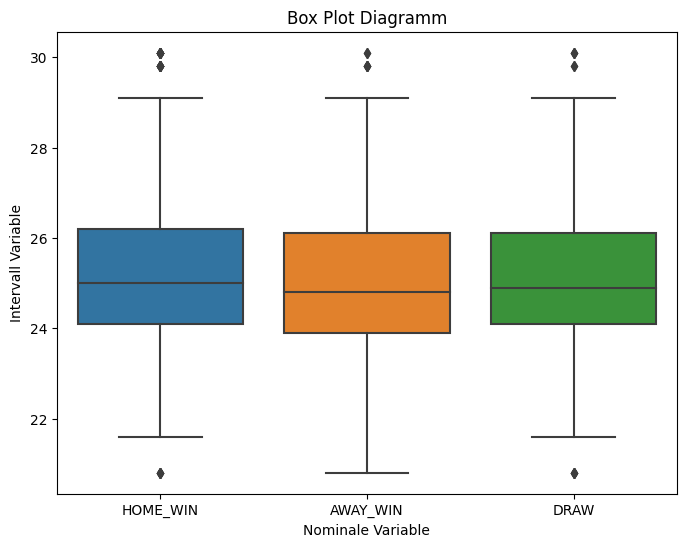

0.00039260107249343776
                sum_sq      df         F    PR(>F)
RESULT       37.651483     2.0  7.853311  0.000393
Residual  13929.970037  5811.0       NaN       NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

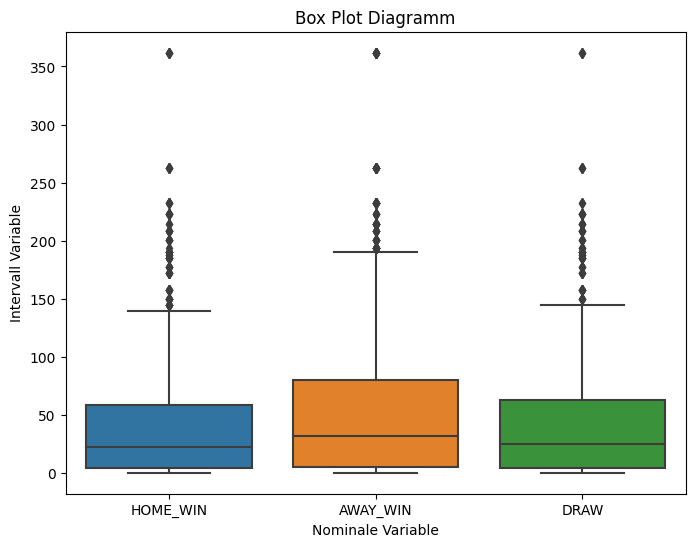

2.3147877490070446e-19
                sum_sq      df         F        PR(>F)
RESULT    2.475393e+05     2.0  43.27553  2.314788e-19
Residual  1.448037e+07  5063.0       NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

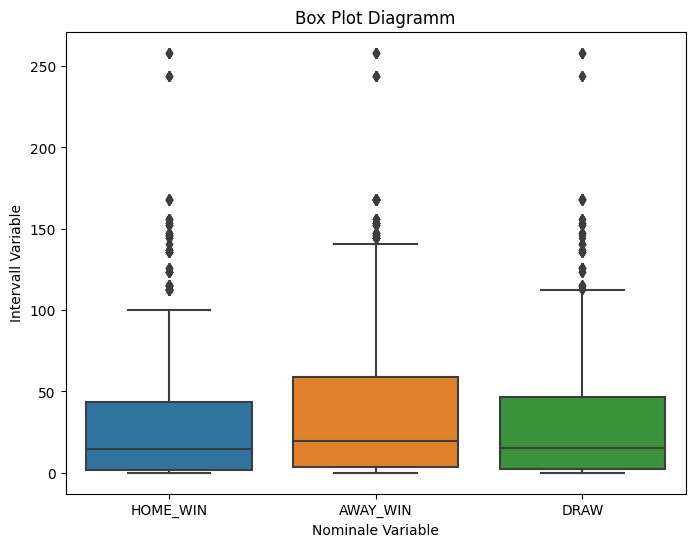

6.268204636076249e-07
                sum_sq      df         F        PR(>F)
RESULT    5.190581e+04     2.0  14.32717  6.268205e-07
Residual  8.309105e+06  4587.0       NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

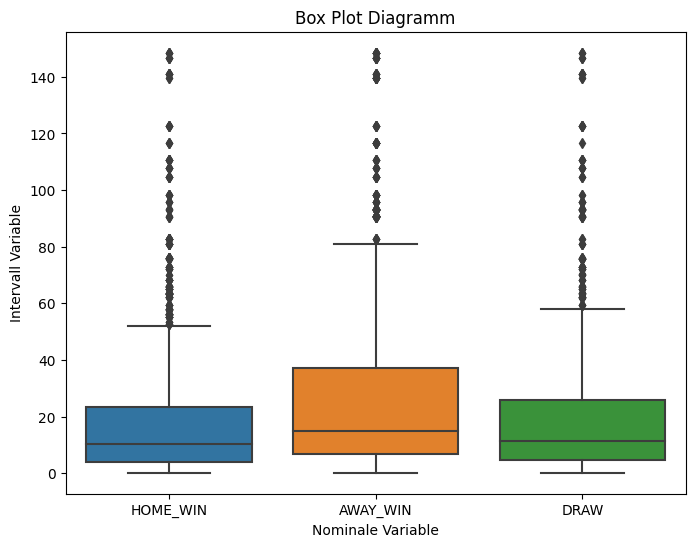

1.1829369390150436e-36
                sum_sq      df          F        PR(>F)
RESULT    1.173713e+05     2.0  83.931809  1.182937e-36
Residual  4.003656e+06  5726.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

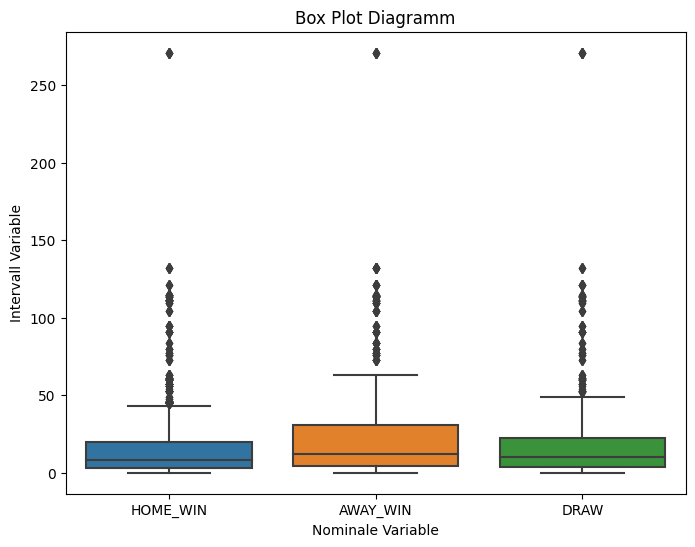

1.1522880461836817e-11
                sum_sq      df          F        PR(>F)
RESULT    3.868051e+04     2.0  25.301562  1.152288e-11
Residual  4.233955e+06  5539.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

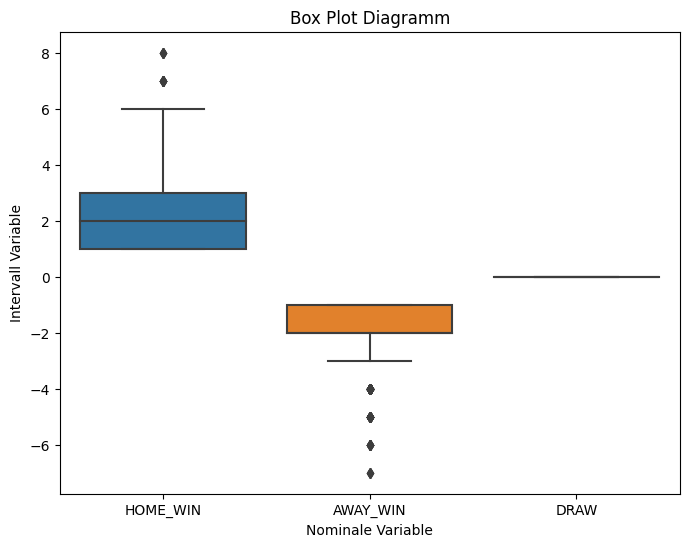

0.0
                sum_sq      df            F  PR(>F)
RESULT    15549.071110     2.0  8186.526003     0.0
Residual   5518.558921  5811.0          NaN     NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

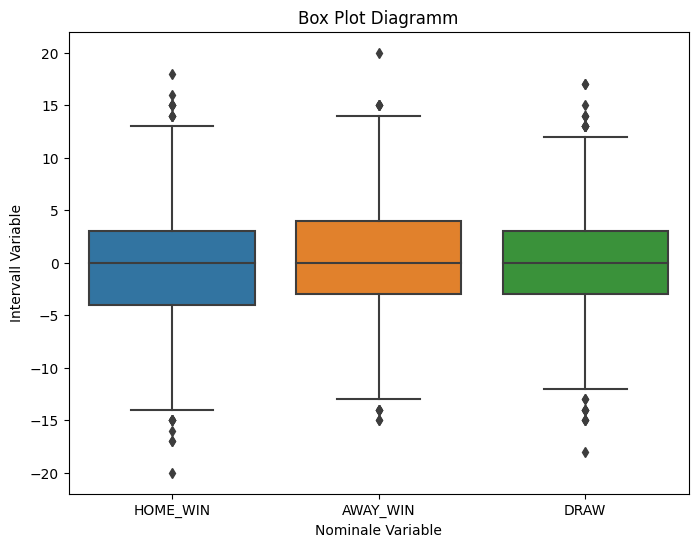

1.1338746330538543e-09
                 sum_sq      df          F        PR(>F)
RESULT      1027.984198     2.0  20.670808  1.133875e-09
Residual  144494.015802  5811.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

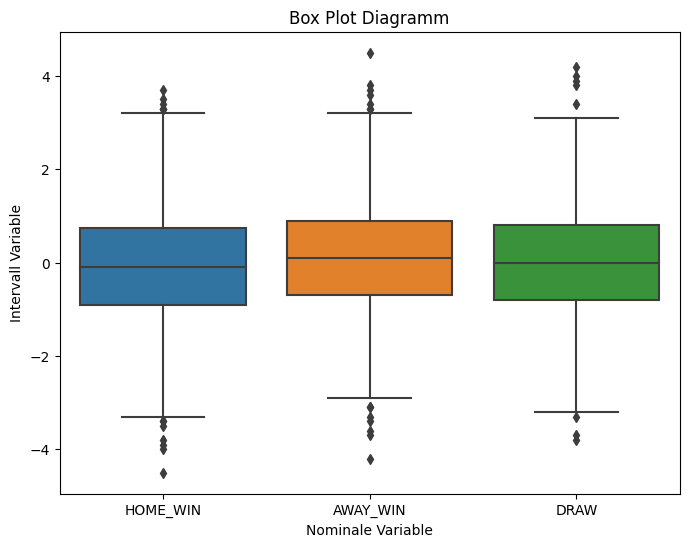

4.506628234726539e-07
              sum_sq      df          F        PR(>F)
RESULT      43.30027     2.0  14.649353  4.506628e-07
Residual  8588.01973  5811.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

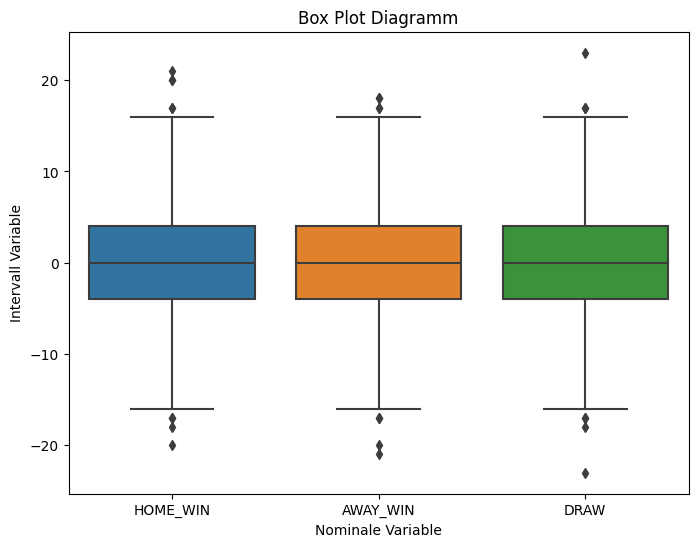

0.3725363255057045
                 sum_sq      df         F    PR(>F)
RESULT        61.865134     2.0  0.987589  0.372536
Residual  182008.134866  5811.0       NaN       NaN


'Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von {num_cat}'

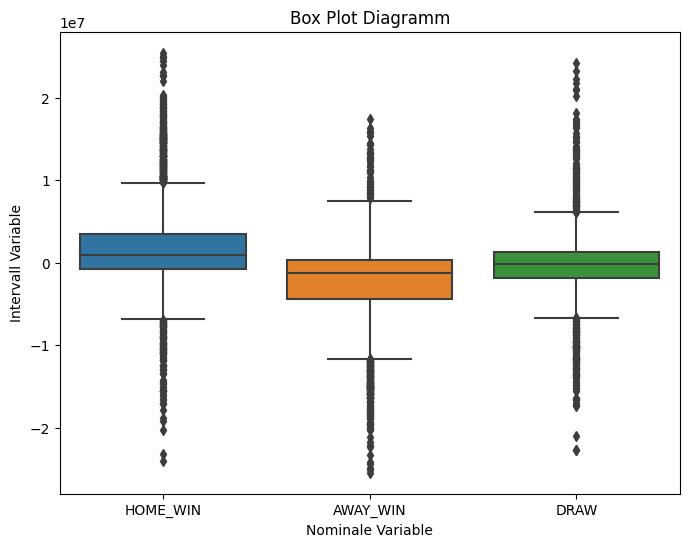

4.96968777512792e-147
                sum_sq      df           F         PR(>F)
RESULT    2.159290e+16     2.0  357.183318  4.969688e-147
Residual  1.756469e+17  5811.0         NaN            NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

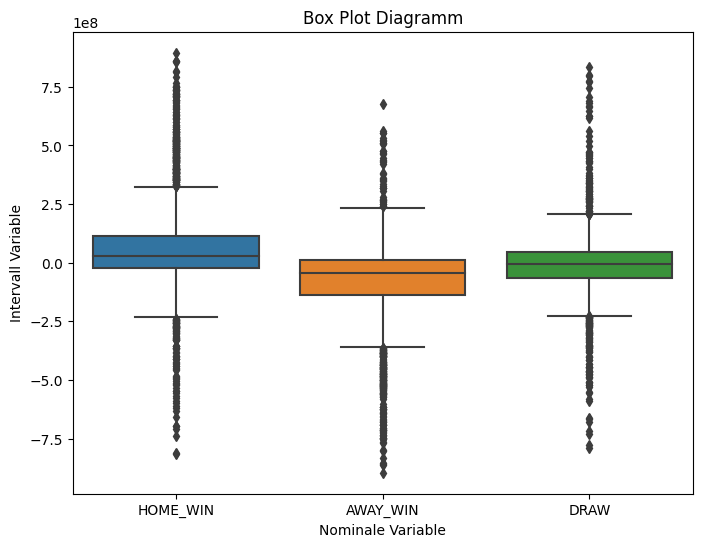

2.5583703326255904e-137
                sum_sq      df           F         PR(>F)
RESULT    2.354093e+19     2.0  332.168815  2.558370e-137
Residual  2.059139e+20  5811.0         NaN            NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

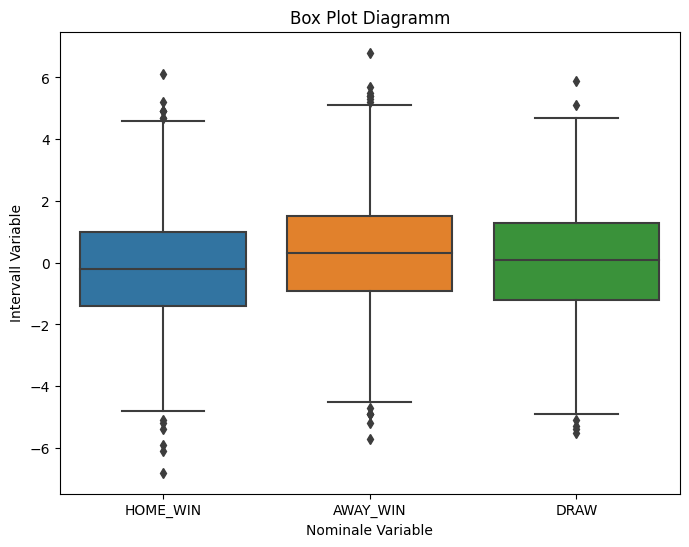

2.667868893507894e-19
                sum_sq      df         F        PR(>F)
RESULT      276.089556     2.0  43.08415  2.667869e-19
Residual  18618.870444  5811.0       NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

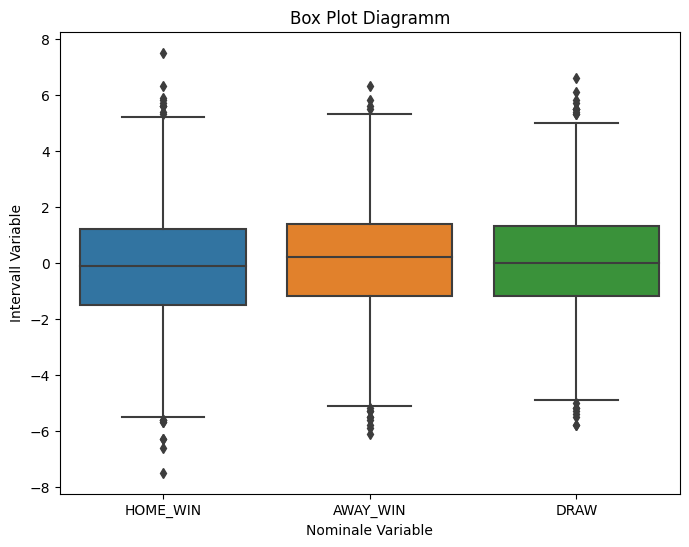

1.3371753873539433e-05
                sum_sq      df          F    PR(>F)
RESULT       89.218725     2.0  11.244067  0.000013
Residual  23054.381275  5811.0        NaN       NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

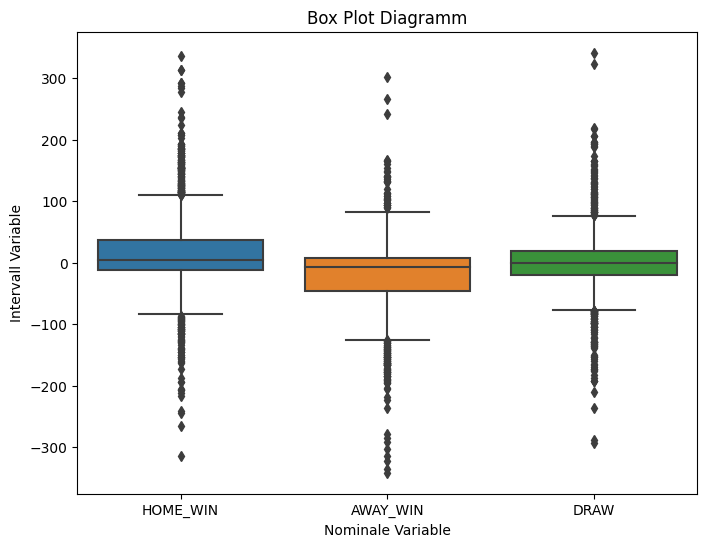

3.4564435979531956e-56
                sum_sq      df           F        PR(>F)
RESULT    9.894477e+05     2.0  131.210023  3.456444e-56
Residual  1.786073e+07  4737.0         NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

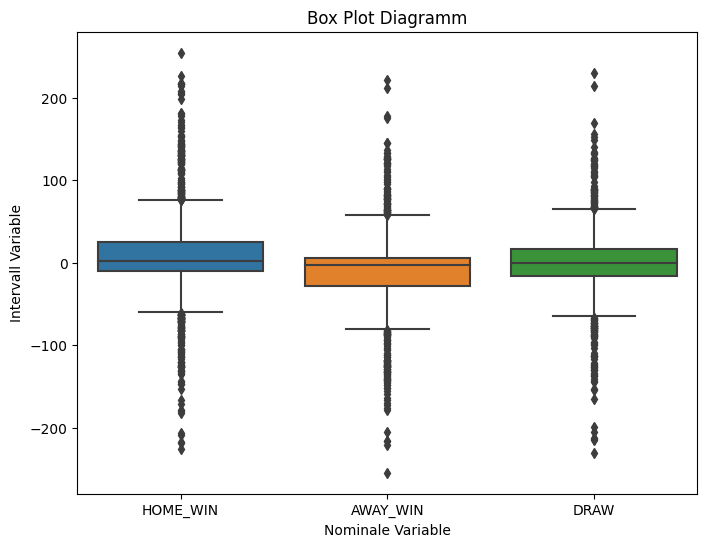

1.9086534532346906e-20
                sum_sq      df          F        PR(>F)
RESULT    2.341249e+05     2.0  45.896079  1.908653e-20
Residual  1.079158e+07  4231.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

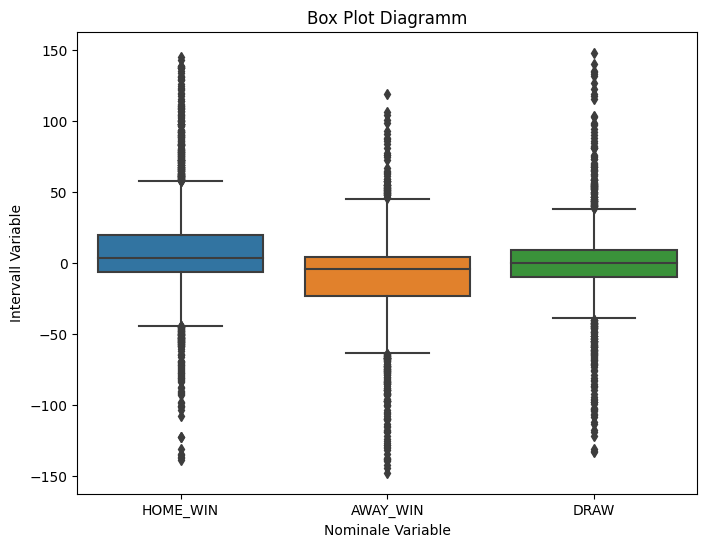

6.24588047417126e-72
                sum_sq      df           F        PR(>F)
RESULT    3.742089e+05     2.0  168.811427  6.245880e-72
Residual  6.254497e+06  5643.0         NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

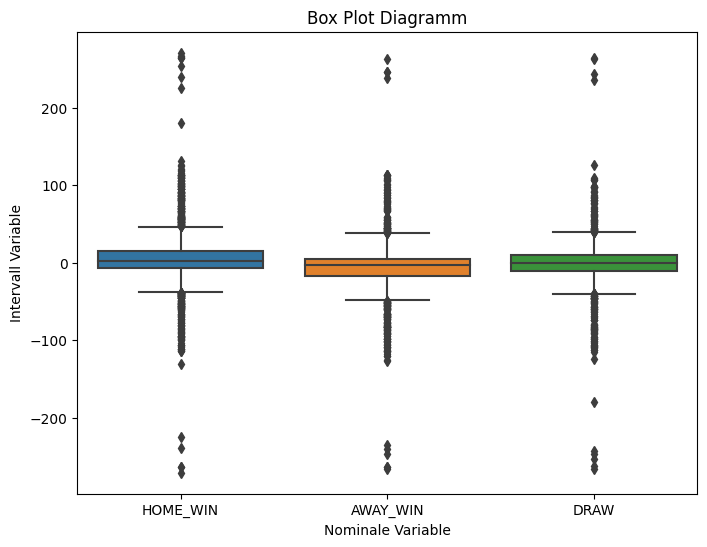

2.452822854946811e-22
                sum_sq      df          F        PR(>F)
RESULT    1.330087e+05     2.0  50.231806  2.452823e-22
Residual  6.986478e+06  5277.0        NaN           NaN


'Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}'

In [56]:
import pandas as pd




# ANOVA durchführen
#model = ols('MetrischeVariable ~ NominaleVariable', data=df).fit()

for num_cat in df_num_var_list:

    model = ols(f'{num_cat} ~ RESULT', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Kastendiagramm erstellen
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='RESULT', y=num_cat, data=df)
    plt.xlabel('Nominale Variable')
    plt.ylabel('Intervall Variable')
    plt.title('Box Plot Diagramm')
    plt.show()

    p_value = anova_table['PR(>F)'][0]

    if p_value < significance_level:
        print(p_value)
        print(anova_table)
        display(f"Die Nullhypothese wird abgelehnt (signifikant): Die beiden Variablen sind stochastisch abhängig. Das Spielergebnis unterscheidet sich signifikant von {num_cat}")
    else:
        print(p_value)
        print(anova_table)
        display(f"Die Nullhypothese wird nicht abgelehnt (nicht signifikant): Die beiden Variablen sind stochastisch unabhängig. Das Spielergebnis unterscheidet sich NICHT signifikant von {num_cat}")
    

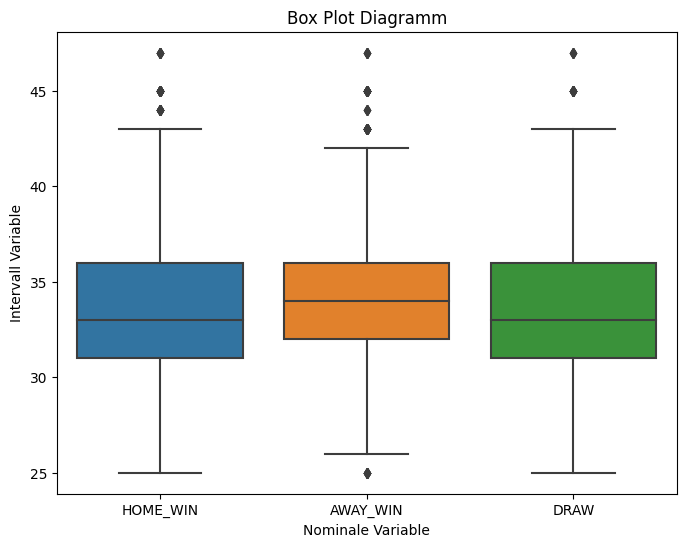